# Группа DE_622, Студент: Виталий Зайцев

# Домашнее задание по уроку 6  
1) Развернуть окружение  
2) Создать даг для дампа всех таблиц, используя операторы из урока

---

# Выполнение домашнего задания

# 0. Подготовительная часть

## Скачивание образа puckel/docker-airflow  
`docker pull puckel/docker-airflow`

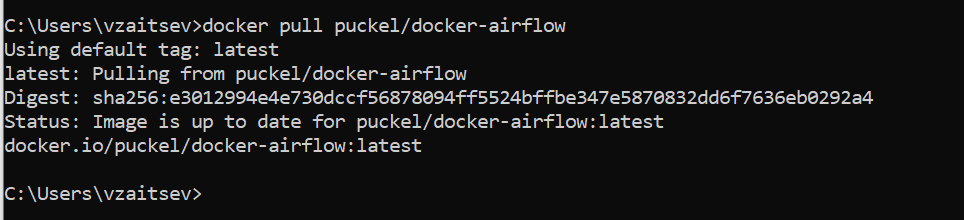

## Создание docker-compose.yml

`
version: "3"
services:
  db1:
    image: "postgres:11"
    container_name: "my_postgres_1"
    ports:
      - "5433:5432"
    volumes:
      - my_dbdata:/var/lib/postgresql/data1
    environment:
      - POSTGRES_PASSWORD=postgres
      - POSTGRES_USER=root
  db2:
    image: "postgres:11"
    container_name: "my_postgres_2"
    ports:
      - "54320:5432"
    volumes:
      - my_dbdata:/var/lib/postgresql/data2
    environment:
      - POSTGRES_PASSWORD=postgres
      - POSTGRES_USER=root
  airflow:
    image: puckel/docker-airflow
    container_name: "airflow"
    ports:
      - "8080:8080"
    environment:
      - PYTHONPATH=/usr/local/airflow/dags/operators/
    volumes:
      - ./dags:/usr/local/airflow/dags
    command: webserver
volumes:
  my_dbdata:  
  `             

##  Запуск контейнера
- шаг 0 Почистим предыдущие неиспользуемые volumes  
Remove all unused local volumes. Unused local volumes are those which are not referenced by any containers.  
`docker volume prune`
- шаг 1 copypast docker-compose.yml в папку папку размещения airflow /usr/local/airflow/
- шаг 2 переход в папку размещения airflow /usr/local/airflow/  (в моём случае Win10 и папка ниже)  
`cd C:\Users\vzaitsev\airflow`
- шаг 3 запуск докера  
`docker-compose up -d`

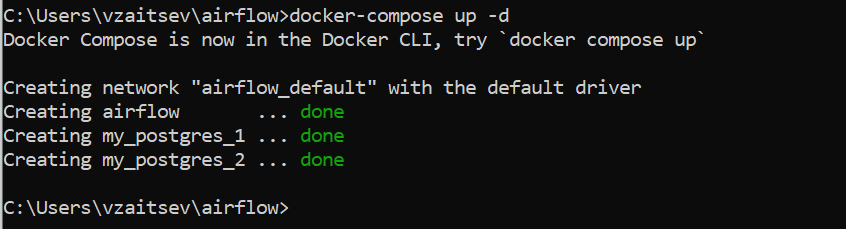

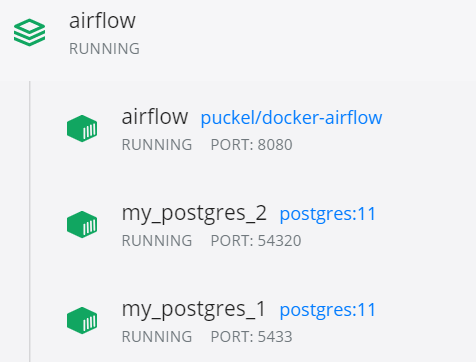

## Ключевые пути airflow

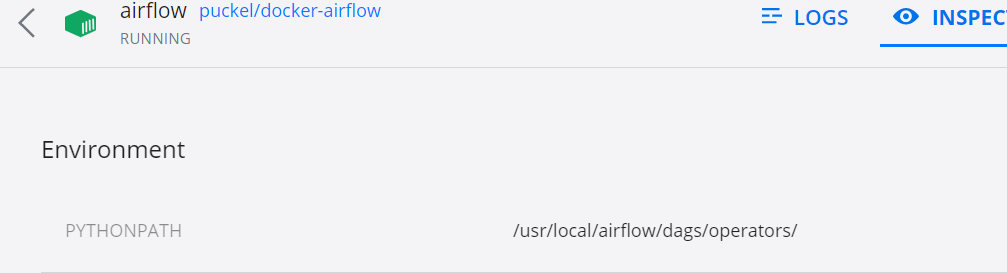

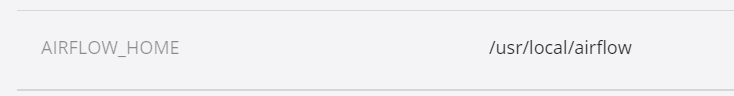

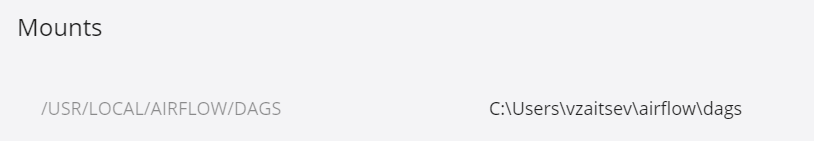

## Проверка доступа админки airflow 
http://localhost:8080/admin/

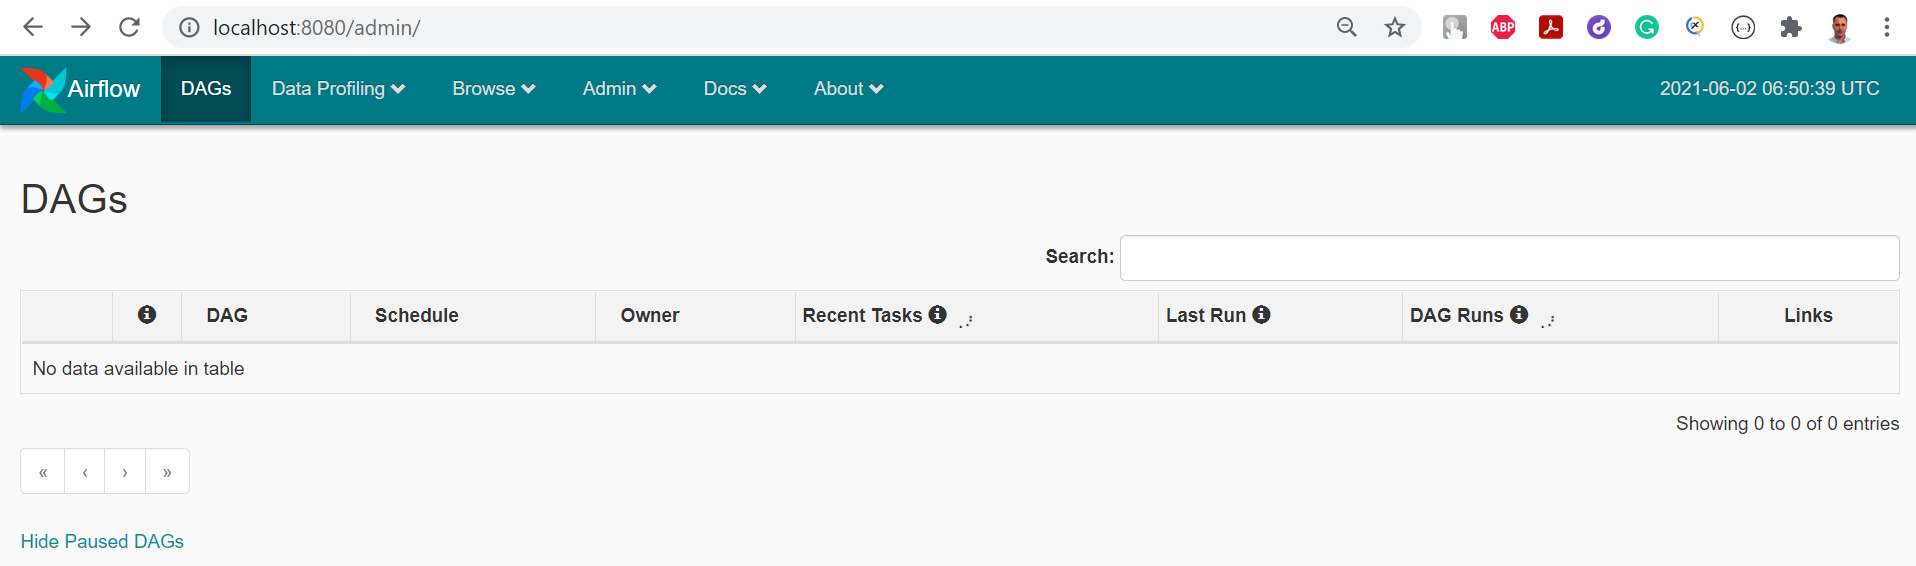

## Проверка выкладки тестового DAG  

- Проверяем,что DAG папку пустая
- Копипастим тестовый DAG
- ждать 30 минут или перебилдить образ (я не понял - почему изменения конфига airflow.cfg НЕ применяются, также НЕ понял - почему при простом перезапуске образа новоразмещённые DAGи НЕ появляются в админке сразу)

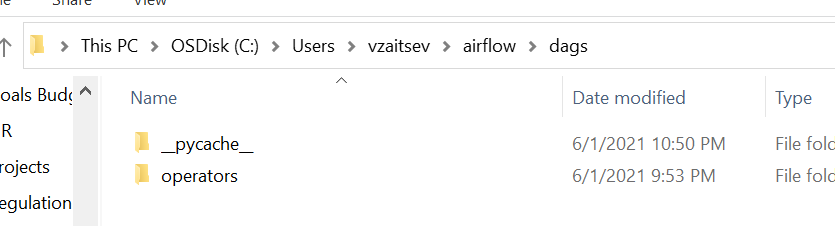

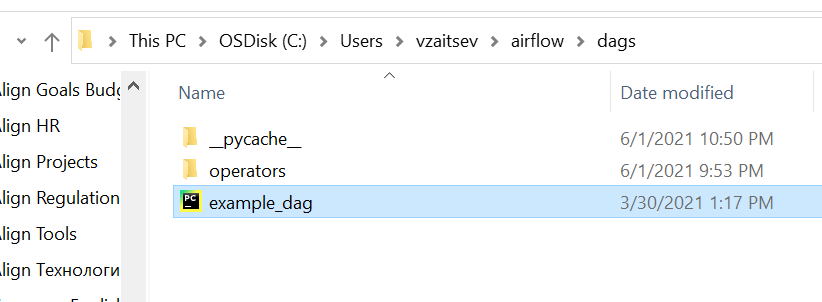

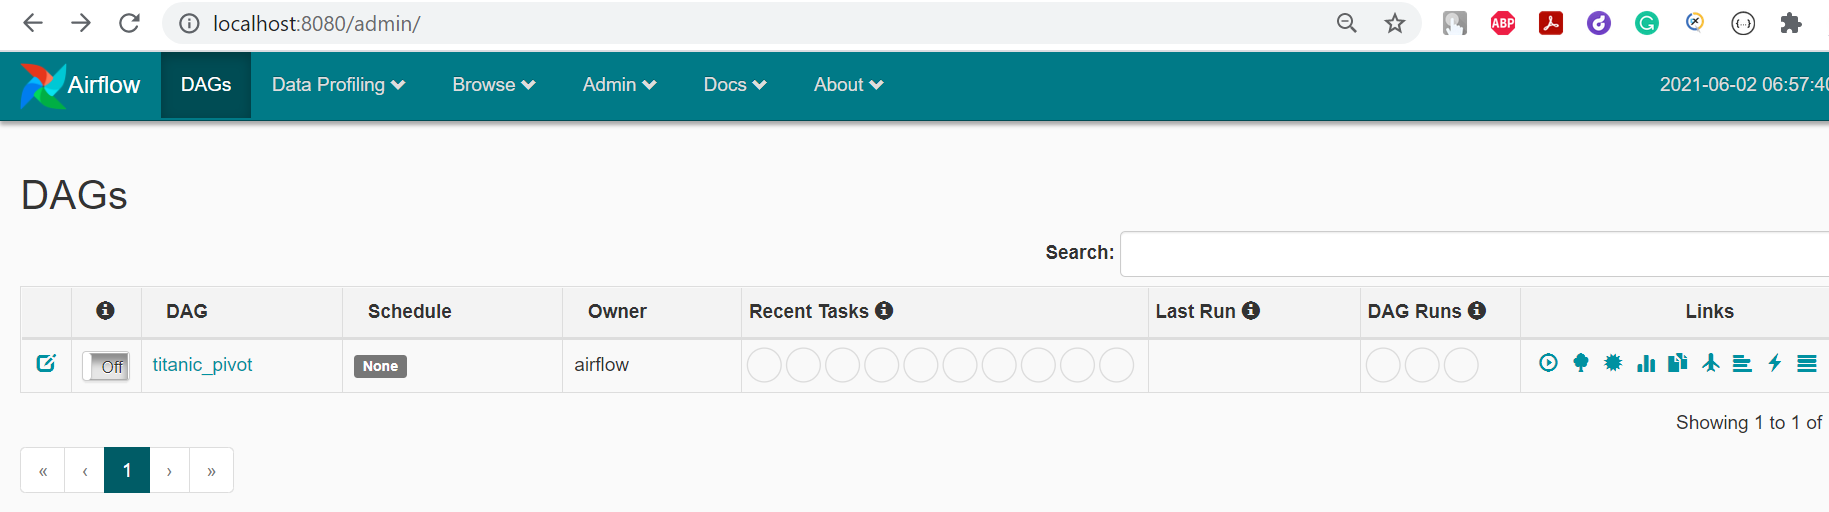

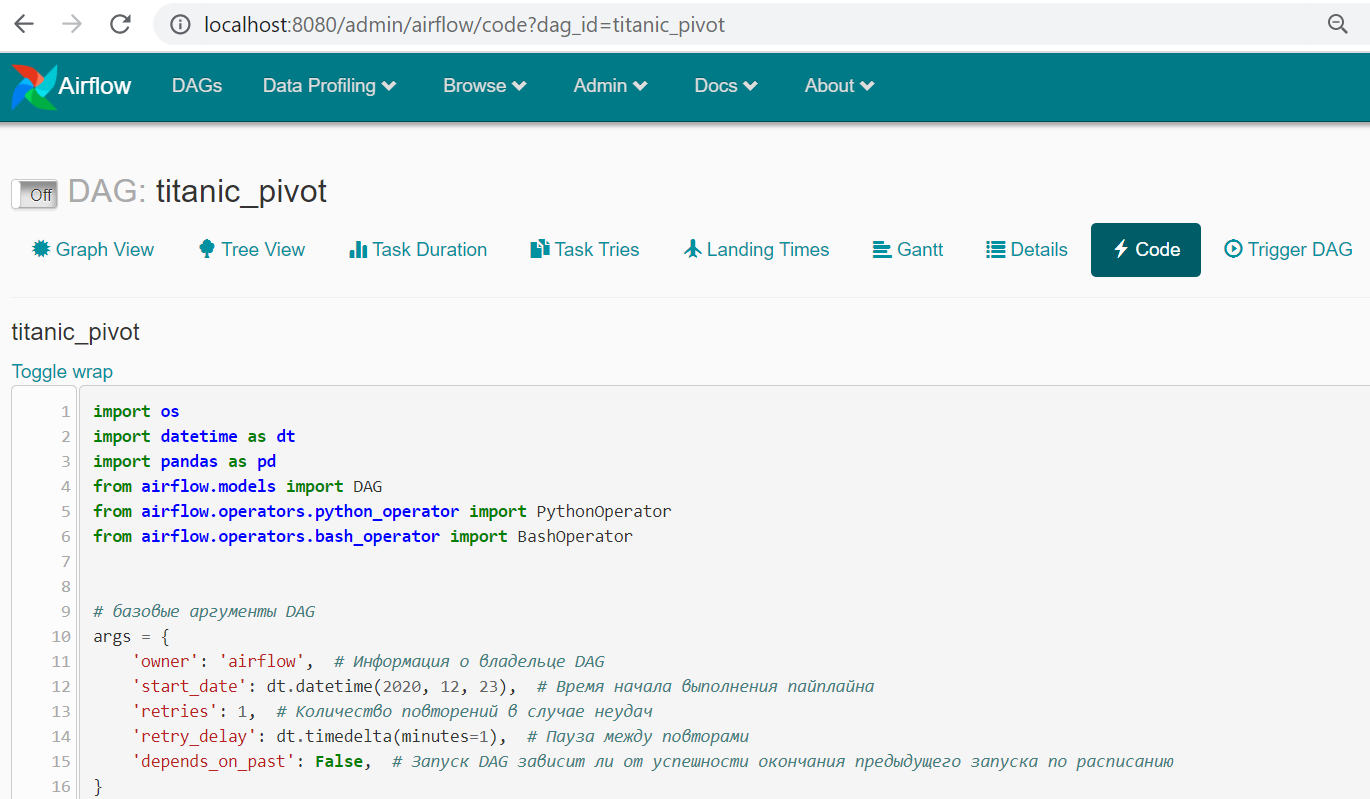

## Создание баз для работы

`docker exec -it my_postgres_1 psql -U root -c "create database my_database_1"`  

`docker exec -it my_postgres_2 psql -U root -c "create database my_database_2"`

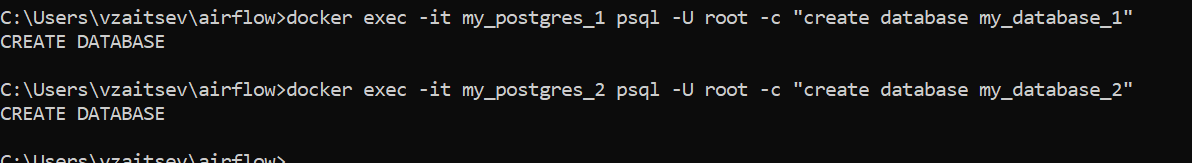

## Проверка соединений к созданным базам

### 'my_database_1' (port 5433) (база-источник)

In [8]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=5433 dbname='my_database_1' user='root' password='postgres'" 

# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    #query = 'select * from customer limit 1' # запрос к БД
    query = 'SELECT datname FROM pg_database;' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchone() # получение результата
    print(result)

('postgres',)


### 'my_database_2' (port 54320) (база-потребитель)

In [9]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 

# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    #query = 'select * from customer limit 1' # запрос к БД
    query = 'SELECT datname FROM pg_database;' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchone() # получение результата
    print(result)

('postgres',)


## Создание таблиц

`  
cd C:\Users\vzaitsev\\!Git-REPO\tpch-kit\dbgen\

docker cp ./dss.ddl my_postgres_1:/

docker cp ./dss.ddl my_postgres_2:/

docker exec -it my_postgres_1 psql my_database_1 -f dss.ddl

docker exec -it my_postgres_2 psql my_database_2 -f dss.ddl  
`

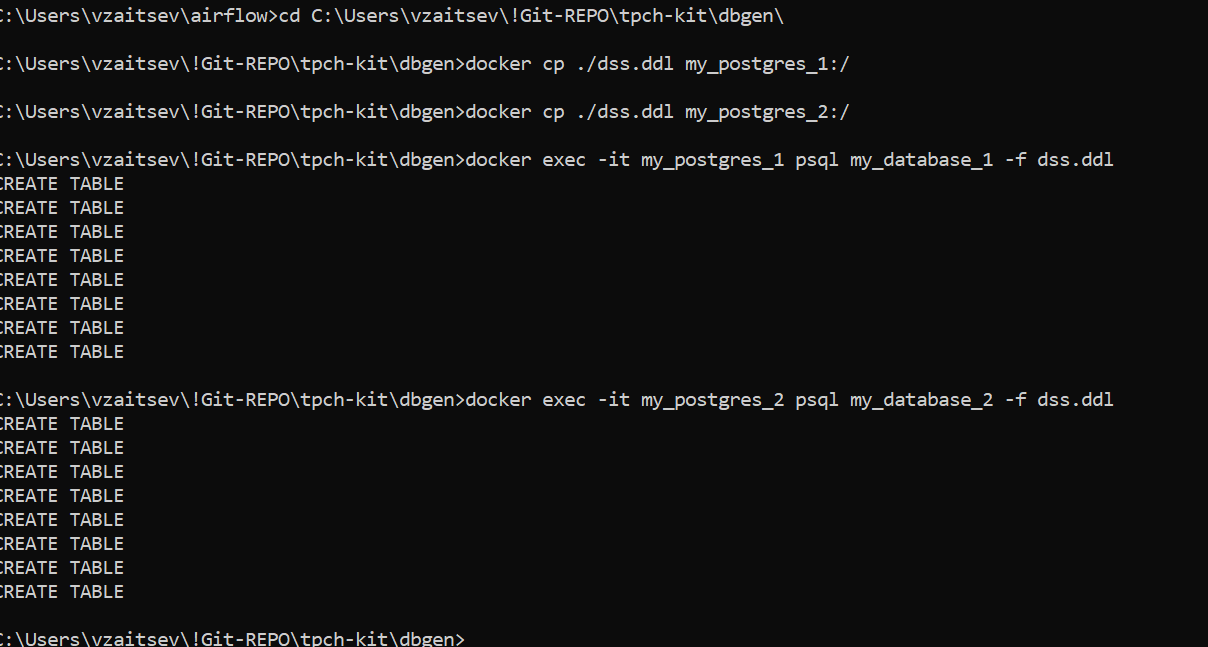

## Синтез данных

Неуспешно, проблема при компиляции makefile под Win10.  
Данные таблиц получены у предподавателя

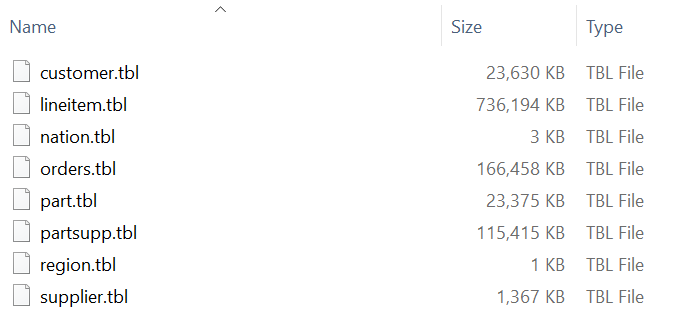

## Наполнение данными базы-источника (контейнер my_postgres_1, база 'my_database_1' (port 5433))

### Копирование данных в контейнер

`
cd C:\Generated tables
docker cp ./customer.tbl my_postgres_1:/
docker cp ./lineitem.tbl my_postgres_1:/
docker cp ./nation.tbl my_postgres_1:/
docker cp ./orders.tbl my_postgres_1:/
docker cp ./part.tbl my_postgres_1:/
docker cp ./partsupp.tbl my_postgres_1:/
docker cp ./region.tbl my_postgres_1:/
docker cp ./supplier.tbl my_postgres_1:/
`

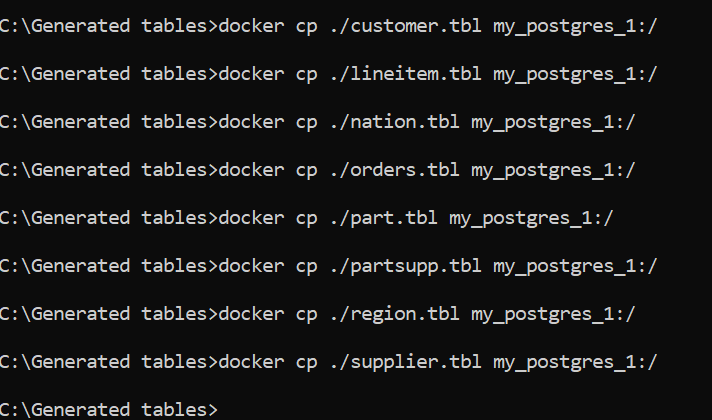

## Загрузка данных в базу

`
docker exec -it my_postgres_1 psql my_database_1 -c "\copy customer FROM '/customer.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy lineitem FROM '/lineitem.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy nation FROM '/nation.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy orders FROM '/orders.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy part FROM '/part.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy partsupp FROM '/partsupp.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy region FROM '/region.tbl' CSV DELIMITER '|'"
docker exec -it my_postgres_1 psql my_database_1 -c "\copy supplier FROM '/supplier.tbl' CSV DELIMITER '|'"
`

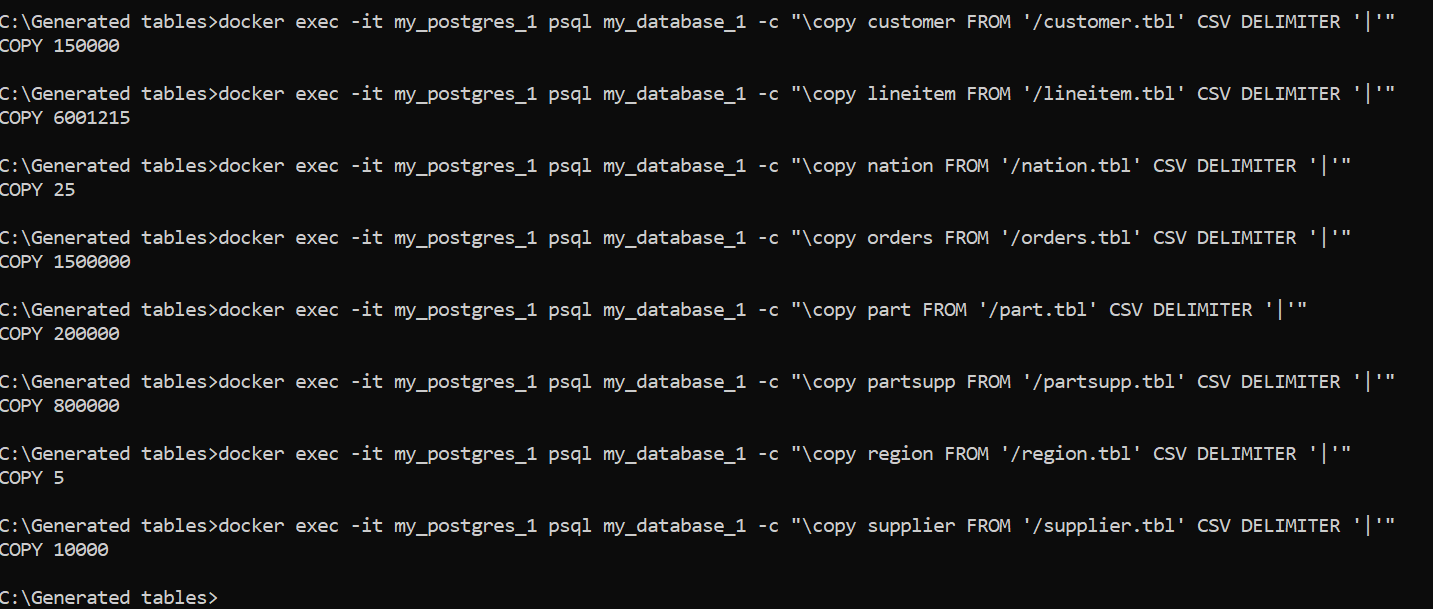

## Проверка наличия данных (контейнер my_postgres_1, база 'my_database_1' (port 5433))

In [10]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=5433 dbname='my_database_1' user='root' password='postgres'" 

# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    query = 'select * from customer limit 2' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchall() # получение результата
    print(result)

[(1, 'Customer#000000001', 'IVhzIApeRb ot,c,E', 15, '25-989-741-2988', Decimal('711.56'), 'BUILDING  ', 'to the even, regular platelets. regular, ironic epitaphs nag e'), (2, 'Customer#000000002', 'XSTf4,NCwDVaWNe6tEgvwfmRchLXak', 13, '23-768-687-3665', Decimal('121.65'), 'AUTOMOBILE', 'l accounts. blithely ironic theodolites integrate boldly: caref')]


## Проверка наличия данных (контейнер my_postgres_1, база 'my_database_1' (port 5433)) (via DBeaver)

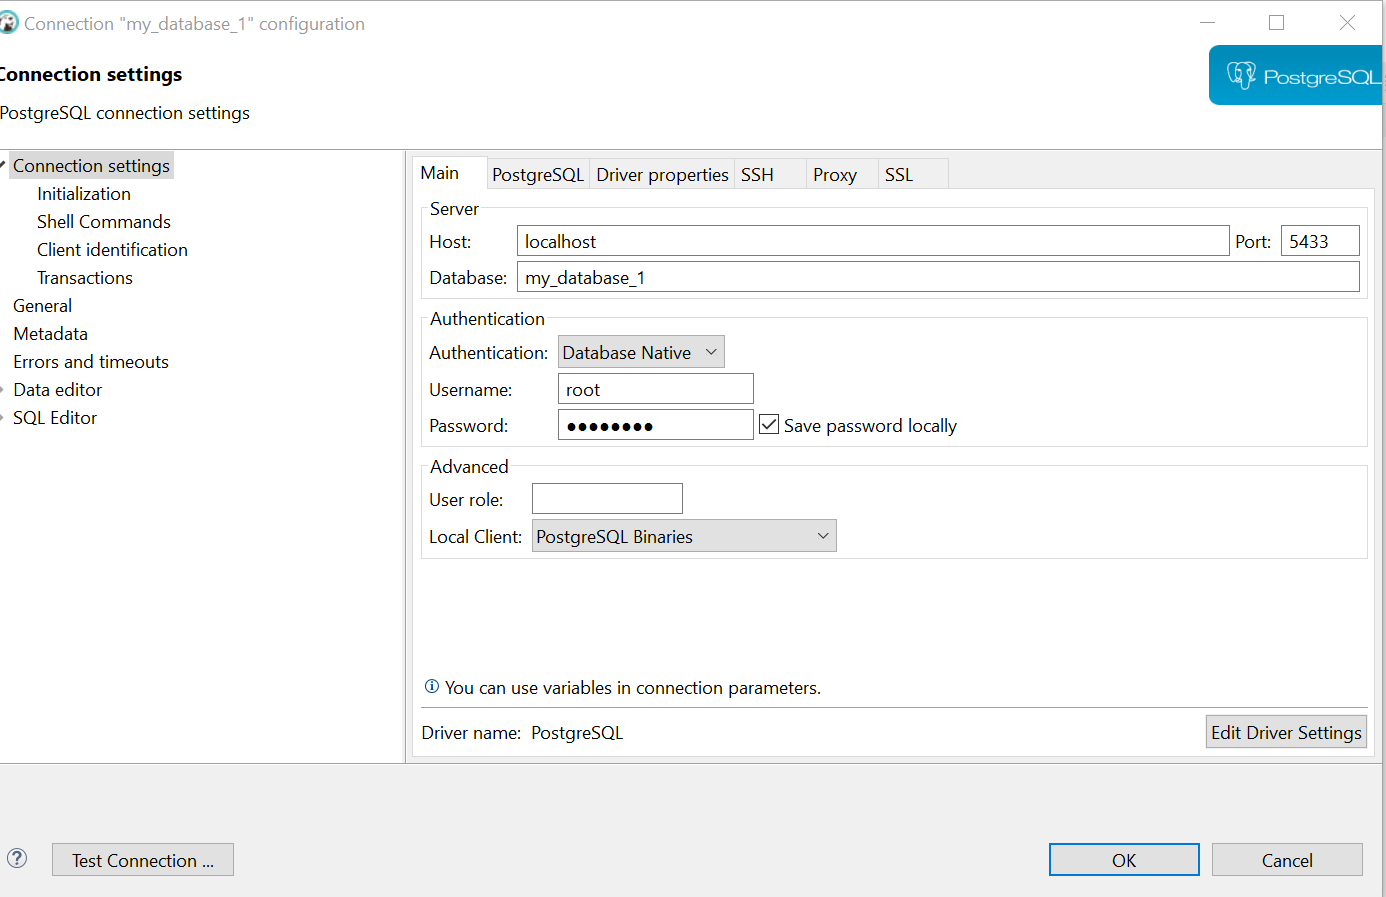

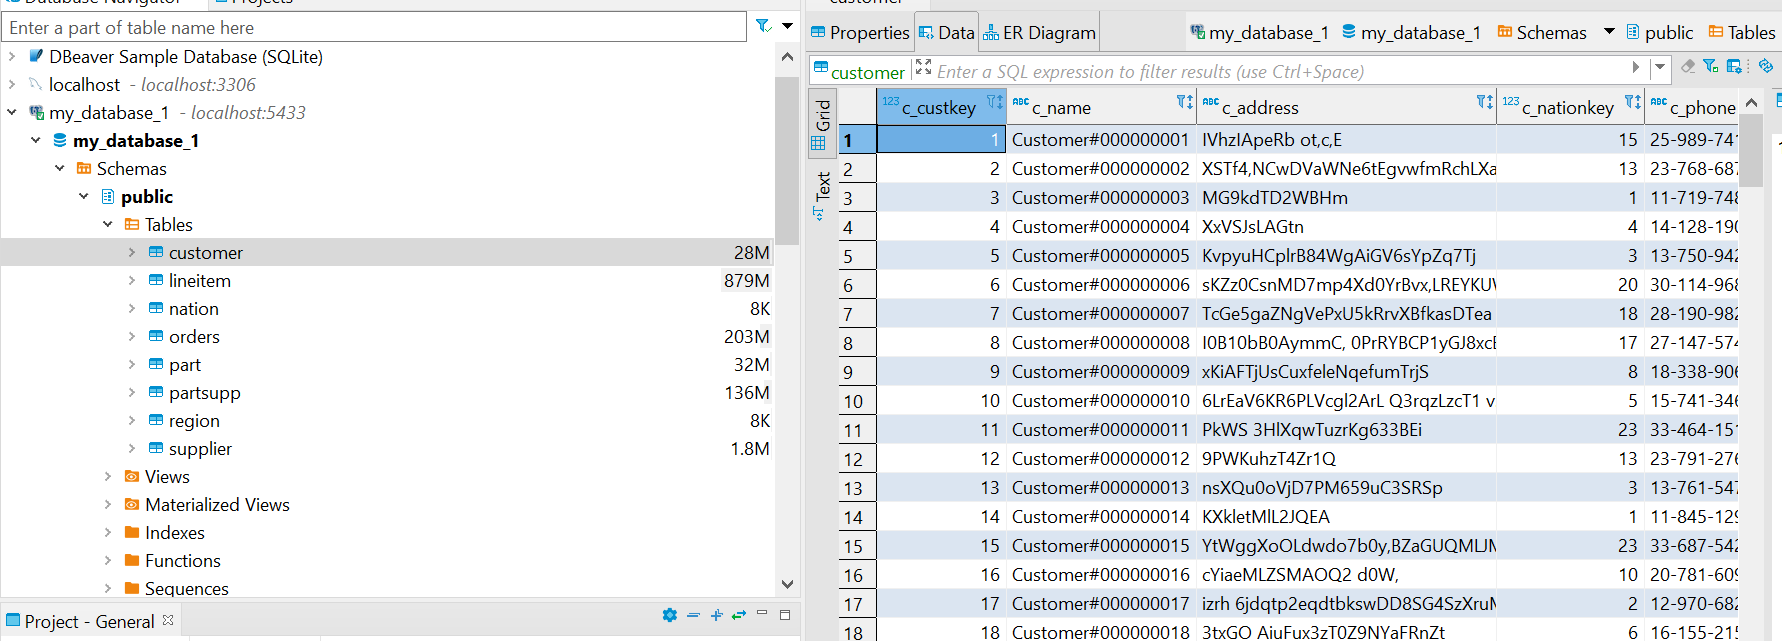

## Корректировка переменных окружения

Указывали на необходимость добавления пути к папке размещения Operators в ENV

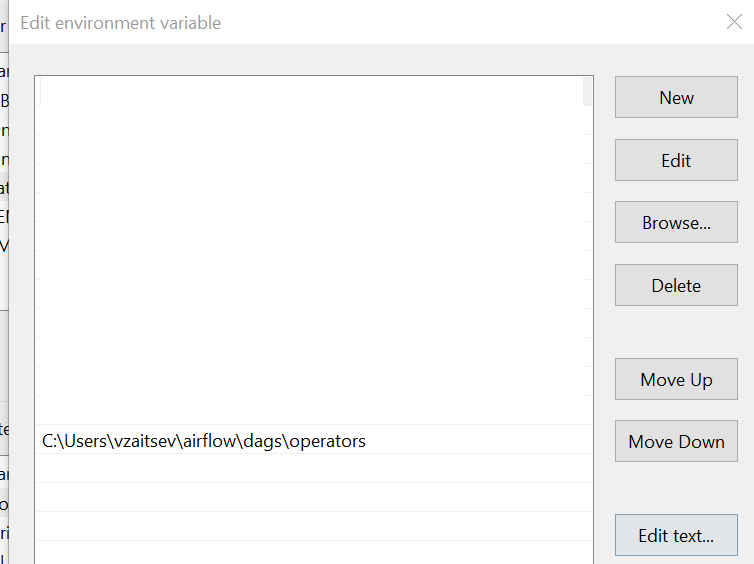

Также добавил отдельную переменную окружения AIRFLOW_HOME
AIRFLOW_HOME = C:\Users\vzaitsev\airflow

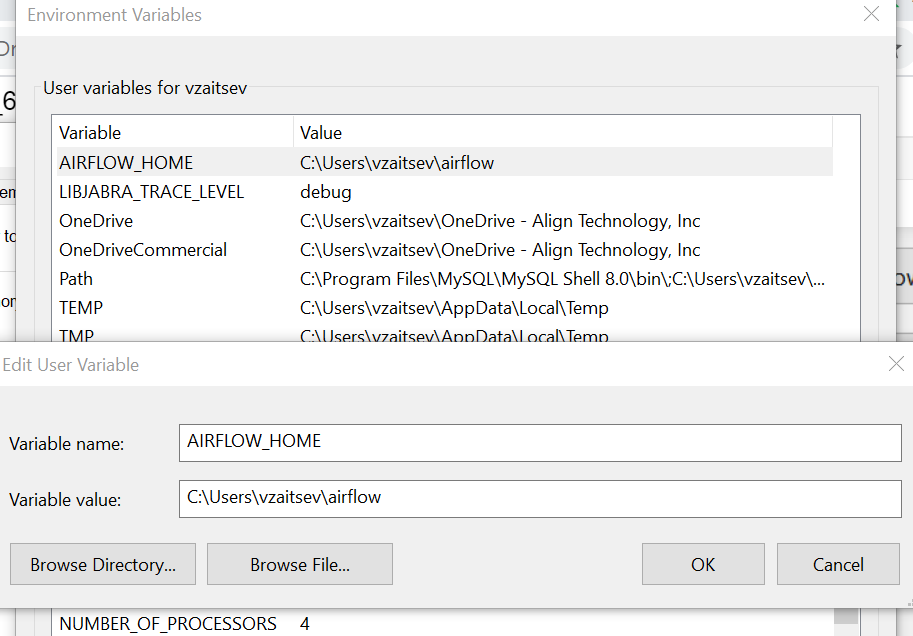

---

# Написание ETL системы

Требуется:    
1. Подготовить модуль Operators/data_transfer.py, в котором определить      
class DataTransfer(BaseOperator): родительский класс - в методе execute определяет общий механизм загрузки данных из STDIN в target базу-таблицу
Класс абстрактный, метод provide_data будет переопределён в дочерних классах   
   
   
2. Подготовить модуль Operators/postgres.py, в котором определить   
class DataTransferPostgres(DataTransfer): дочерний класс - частный механизм загрузки данных, в котором определён метод provide_data (чтение данных из source базы-таблицы и выгрузка в STDOUT) 
   
   
3. Создать DAG #1 переноса таблицы #1   
   
   
4. Создать Jyputer-notebook код верификации #1 - count строк в целевой загруженной таблице #1  
   
   
5. Повторить операции 3. и 4. для оставшихся 7-ми таблиц

Appendix A. Перечень таблиц   
customer   
lineitem   
nation   
orders   
part   
partsupp   
region   
supplier   

## Модуль operators/data_transfer.py   
class DataTransfer(BaseOperator): родительский класс - в методе execute определяет общий механизм загрузки данных из STDIN в target базу-таблицу Класс абстрактный, метод provide_data будет переопределён в дочерних классах

In [ ]:
import logging
import os
import psycopg2
from airflow.models import BaseOperator
from airflow.utils.decorators import apply_defaults


class DataTransfer(BaseOperator):
    @apply_defaults
    def __init__(self, config, pg_conn_str, *args, **kwargs):
        super(DataTransfer, self).__init__(
            *args,
            **kwargs
        )
        self.config = config
        self.pg_conn_str = pg_conn_str

    def provide_data(self, csv_file, context):
        pass


    def execute(self, context):
        copy_statement = """
        COPY {target_schema}.{target_table} ({columns}) FROM STDIN with
        DELIMITER '\t'
        CSV
        ESCAPE '\\'
        NULL '';
        """
        schema_name = "{table}".format(**self.config).split(".")
        self.config.update(
            target_schema=schema_name[0],
            target_table=schema_name[1],
        )
        with psycopg2.connect(self.pg_conn_str) as conn, conn.cursor() as cursor:
            cursor.execute(
                """
            select column_name
              from information_schema.columns
             where table_schema = '{target_schema}'
               and table_name = '{target_table}';
            """.format(
                    **self.config
                )
            )
            result = cursor.fetchall()
            columns = ", ".join('"{}"'.format(row) for row, in result)
            self.config.update(columns=columns)

            with open("transfer.csv", "w", encoding="utf-8") as csv_file:
                self.provide_data(csv_file, context)

            self.log.info("writing succed")

            with open('transfer.csv', 'r', encoding="utf-8") as f:
                cursor.copy_expert(copy_statement.format(**self.config), f)

## Модуль operators/postgres.py      
class DataTransferPostgres(DataTransfer): дочерний класс - частный механизм загрузки данных, в котором определён метод provide_data (чтение данных из source базы-таблицы и выгрузка в STDOUT) 

In [ ]:
from operators.data_transfer import DataTransfer
import csv
import psycopg2


class DataTransferPostgres(DataTransfer):
    def __init__(
        self, source_pg_conn_str, query, *args, **kwargs
    ):
        super(DataTransferPostgres, self).__init__(
            source_pg_conn_str=source_pg_conn_str, query=query, *args, **kwargs
        )
        self.source_pg_conn_str = source_pg_conn_str
        self.query = query

    def provide_data(self, csv_file, context):
        pg_conn = psycopg2.connect(self.source_pg_conn_str)
        pg_cursor = pg_conn.cursor()
        query_to_execute = self.query
        self.log.info("Executing query: {}".format(query_to_execute))
        pg_cursor.execute(query_to_execute)
        csvwriter = csv.writer(
            csv_file,
            delimiter="\t",
            quoting=csv.QUOTE_NONE,
            lineterminator="\n",
            escapechar='\\'
        )

        while True:
            rows = pg_cursor.fetchmany(size=1000)
            if rows:
                for row in rows:
                    _row = list(row)
                    csvwriter.writerow(_row)
            else:
                break
        pg_conn.close()

### Внимание! Docker for Windows   
Ошибка: ERROR - could not connect to server: Connection refused  

Решение: Для случая Docker под Windows следует использовать 
host.docker.internal
https://docs.docker.com/docker-for-windows/networking/

    `
    # сам data flow, для таблицы nation
    data_transfer = DataTransferPostgres(
        config={'table': 'public.nation'},
        query='select * from nation',
        task_id='nation',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    `
       
Описание от docker
https://docs.docker.com/docker-for-windows/networking/

P.S.
для случая Linux использовать db1, db2 (НЕ проверял)   
   `    
    # сам data flow, для таблицы nation
    data_transfer = DataTransferPostgres(
        config={'table': 'public.nation'},
        query='select * from nation',
        task_id='nation',
        source_pg_conn_str="host='db1' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='db2' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    `

### Внимание! Занятые порты   
Ошибка: ERROR - could not connect to server: Connection refused

Причина: порты могут быть заняты   
Решение: уточнить занятые порты, поставить диапазон свободных портов

	netsh interface ipv4 show excludedportrange protocol=tcp
	https://stackoverflow.com/questions/65874912/cant-run-docker-on-windows-10-ports-are-not-available
	
	
	Windows resource monitor
	https://overcoder.net/q/12914/%D0%BA%D0%B0%D0%BA-%D1%83%D0%B7%D0%BD%D0%B0%D1%82%D1%8C-%D0%BA%D0%B0%D0%BA%D0%BE%D0%B9-%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81-%D0%BF%D1%80%D0%BE%D1%81%D0%BB%D1%83%D1%88%D0%B8%D0%B2%D0%B0%D0%B5%D1%82-%D0%BF%D0%BE%D1%80%D1%82-%D0%B2-windows
	

## DAG_nation.py (DAG #1 Перенос таблицы nation)

from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-Nation",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы nation
    data_transfer = DataTransferPostgres(
        config={'table': 'public.nation'},
        query='select * from nation',
        task_id='nation',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer


## Проверка миграции таблицы nation

In [14]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from nation')
    print(cursor.fetchall())

[(25,)]


## Screenshots

### Airflow: магия впервые загруженного DAG DataFlow-Nation, ещё НЕ запускался

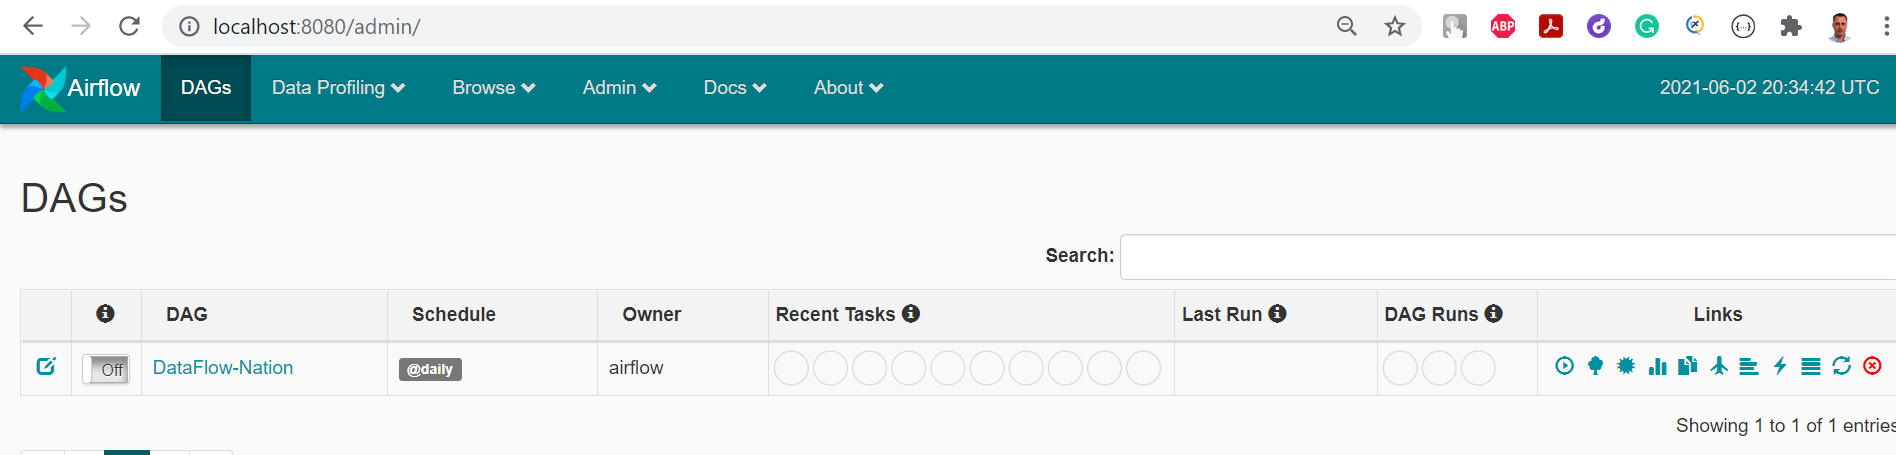

### Целевая таблица nation пуста

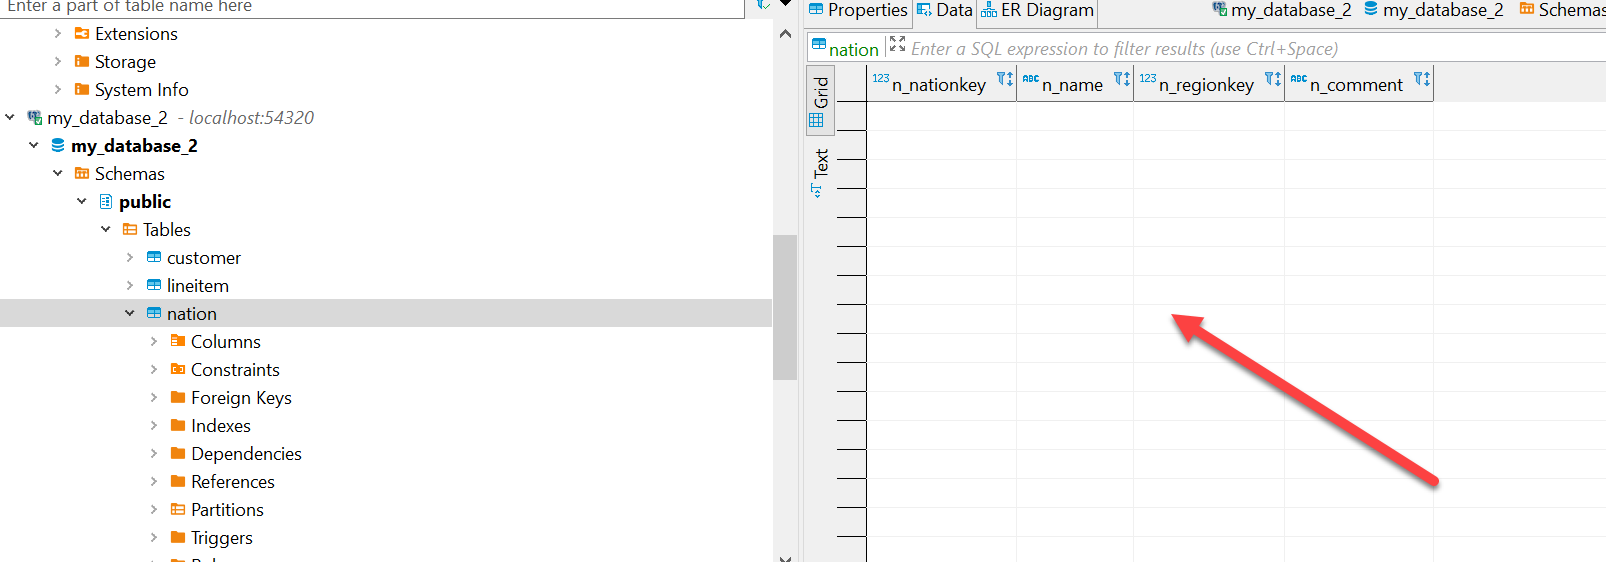

### Airflow: DAG запущен, в процессе

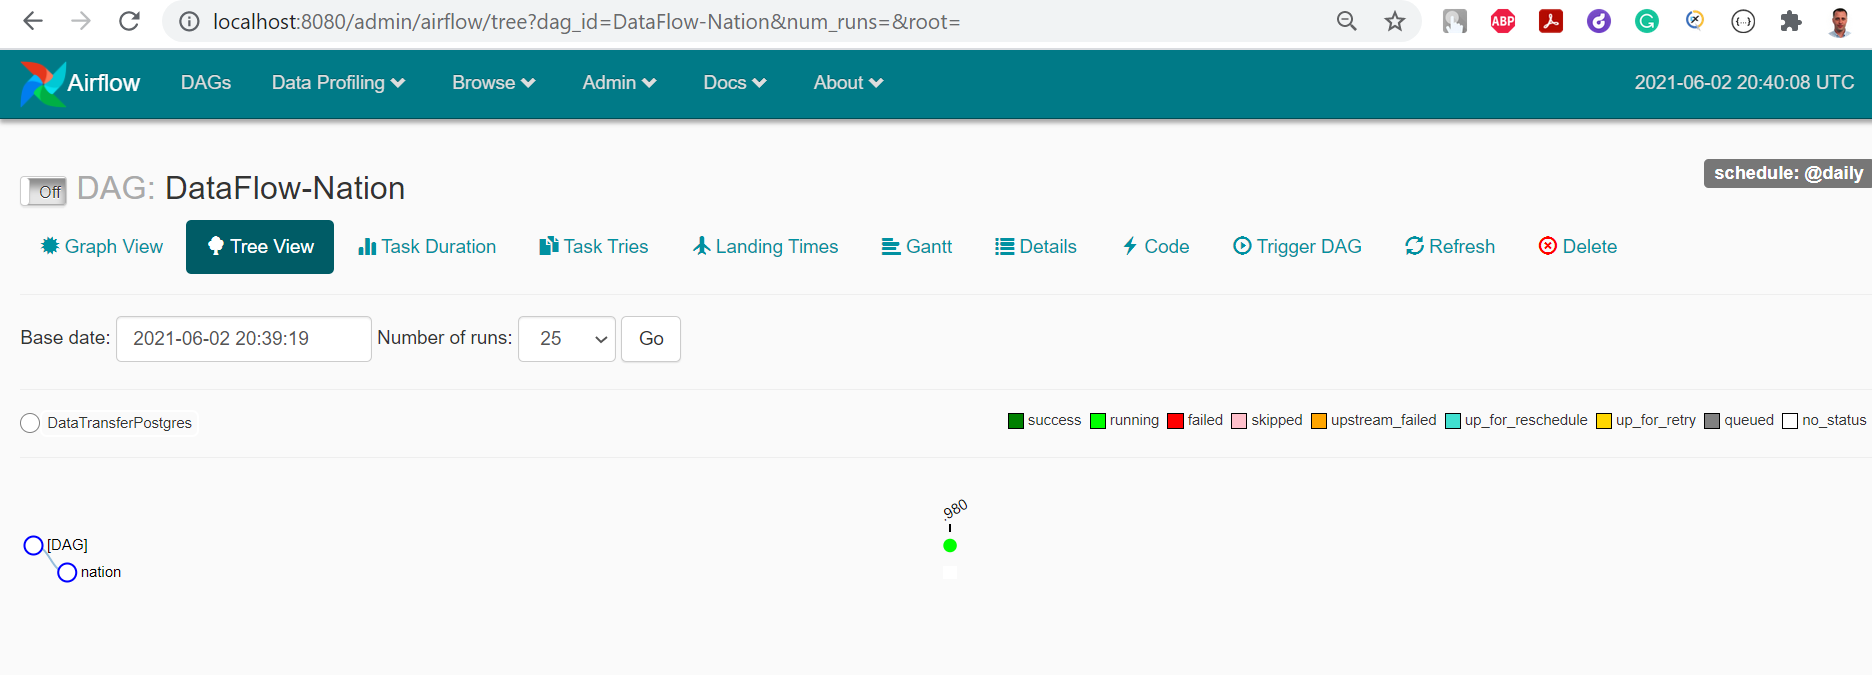

### Airflow: DAG отработал (на скриншоте - история запусков в хоже отладки DAGа)

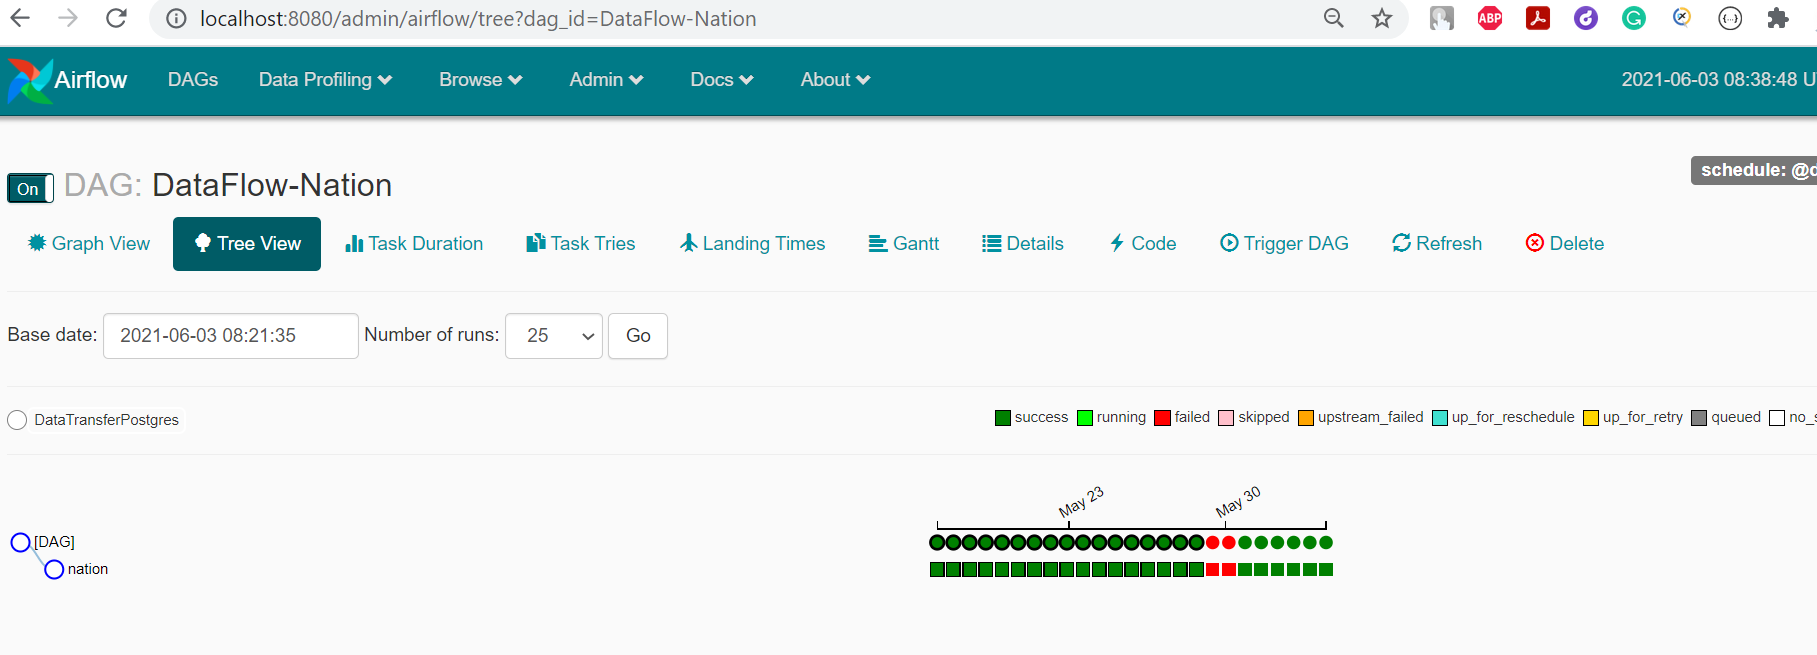

### Данные в целевой таблице nation

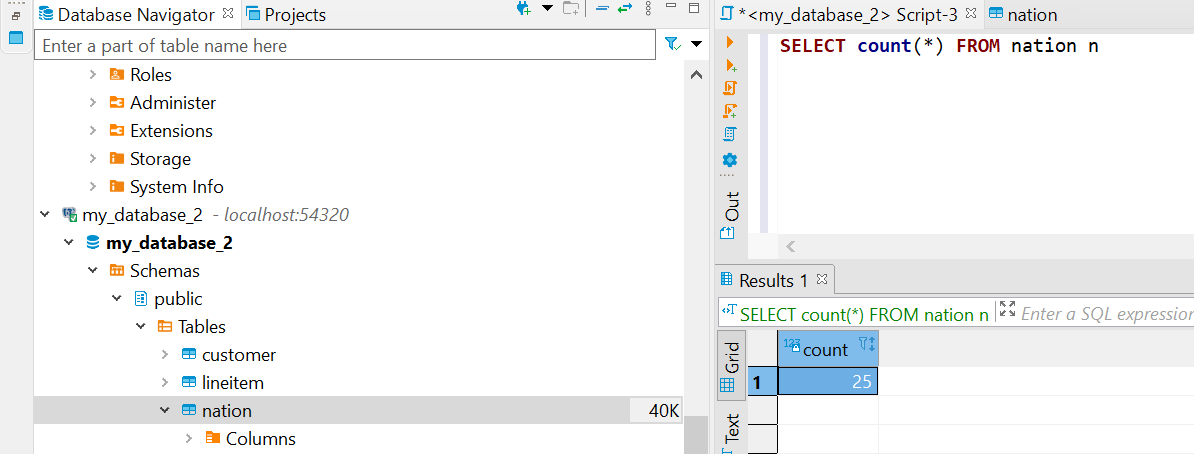

### Airflow: лог последней успешно выполненной задачи

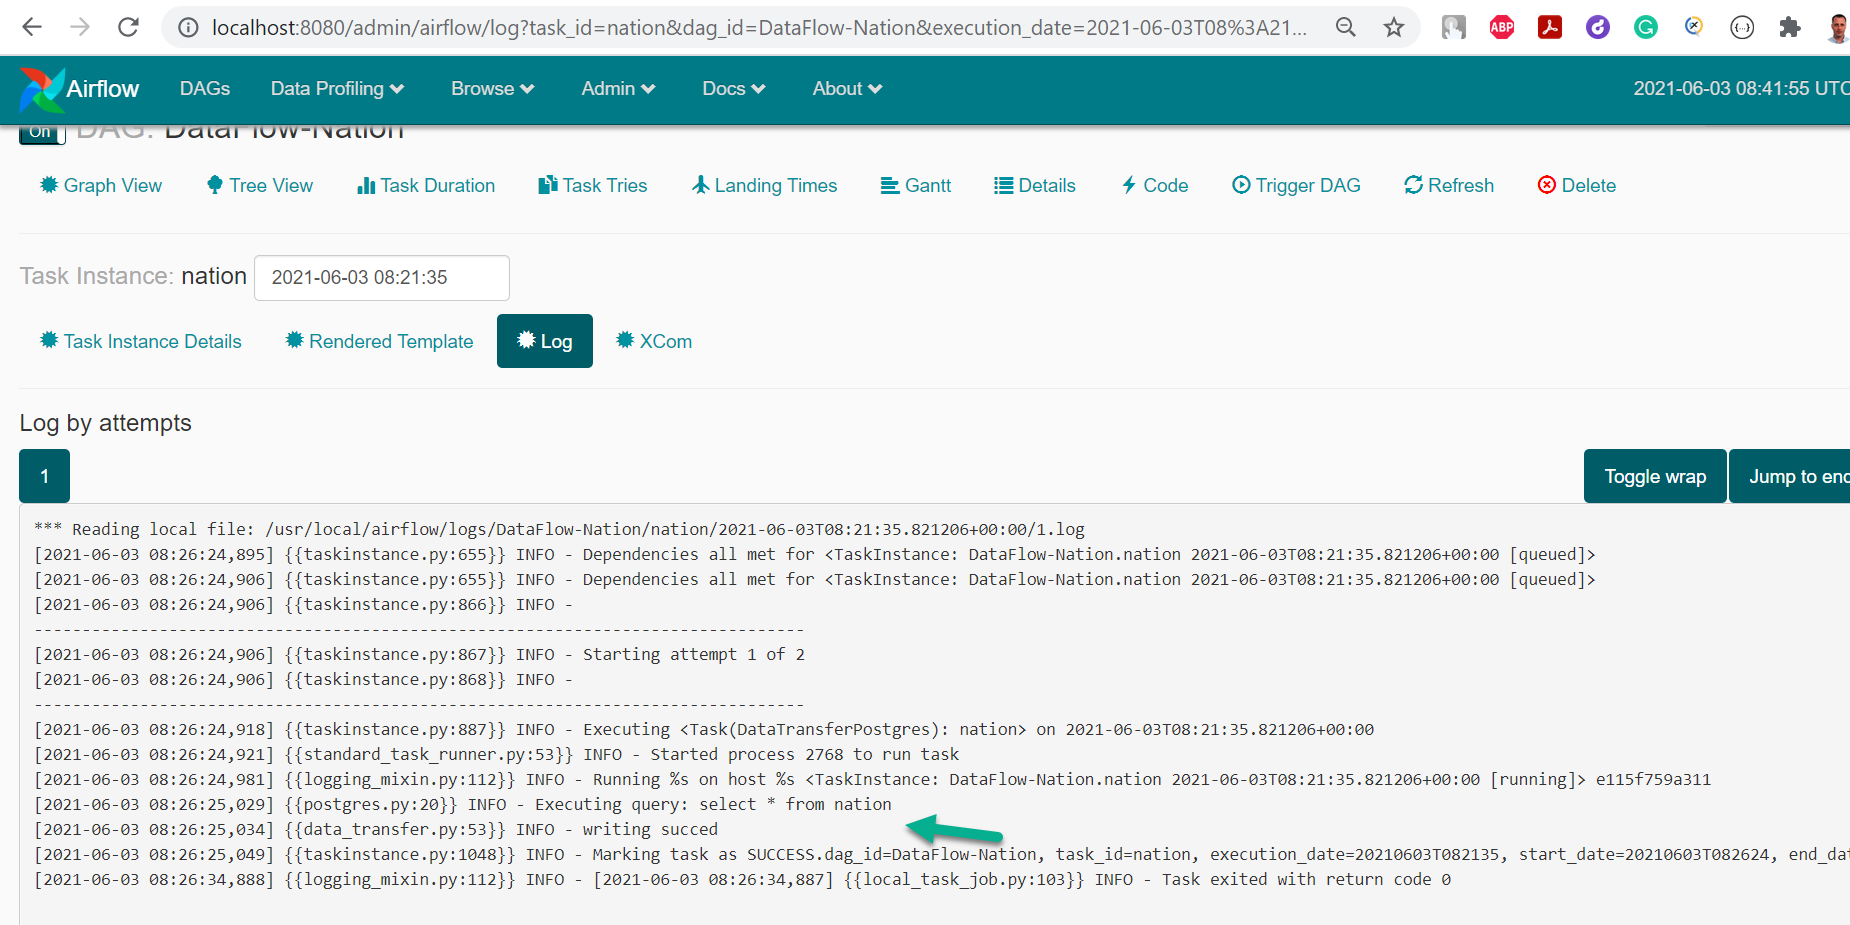

---

## Оставшиеся 7 DAG'ов, сделанные по образцу DAG_nation.py   
DAG_customer.py   
DAG_lineitem.py   
DAG_orders.py   
DAG_part.py   
DAG_partsupp.py   
DAG_region.py   
DAG_supplier   

### DAG_customer.py

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-customer",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы customer
    data_transfer = DataTransferPostgres(
        config={'table': 'public.customer'},
        query='select * from customer',
        task_id='customer',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### DAG_lineitem.py

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-lineitem",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы lineitem
    data_transfer = DataTransferPostgres(
        config={'table': 'public.lineitem'},
        query='select * from lineitem',
        task_id='lineitem',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### DAG_orders.py 

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-orders",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы orders
    data_transfer = DataTransferPostgres(
        config={'table': 'public.orders'},
        query='select * from orders',
        task_id='orders',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### DAG_part.py 

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-part",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы part
    data_transfer = DataTransferPostgres(
        config={'table': 'public.part'},
        query='select * from part',
        task_id='part',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### DAG_partsupp.py 

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-partsupp",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы partsupp
    data_transfer = DataTransferPostgres(
        config={'table': 'public.partsupp'},
        query='select * from partsupp',
        task_id='partsupp',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### DAG_region.py 

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-region",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы region
    data_transfer = DataTransferPostgres(
        config={'table': 'public.region'},
        query='select * from region',
        task_id='region',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### DAG_supplier 

In [ ]:
from airflow.models import DAG
from operators.postgres import DataTransferPostgres
from datetime import datetime

DEFAULT_ARGS = {
    "owner": "airflow",
    "start_date": datetime(2021, 1, 25),
    "retries": 1,
    "email_on_failure": False,
    "email_on_retry": False,
    "depends_on_past": False, # в случае регулярной эксплуатации следует поставить True. Сейчас указал False для целей отладки
}

with DAG(
    dag_id="DataFlow-supplier",
    default_args=DEFAULT_ARGS,
    schedule_interval="@daily",
    max_active_runs=1,
    tags=['data-flow'],
) as dag1:
    # сам data flow, для таблицы supplier
    data_transfer = DataTransferPostgres(
        config={'table': 'public.supplier'},
        query='select * from supplier',
        task_id='supplier',
        source_pg_conn_str="host='host.docker.internal' port=5433 dbname='my_database_1' user='root' password='postgres'",
        pg_conn_str="host='host.docker.internal' port=54320 dbname='my_database_2' user='root' password='postgres'",
    )
    
    # Порядок выполнения тасок
    data_transfer



### Aitflow: вид консоли ДО переноса DAG'ов

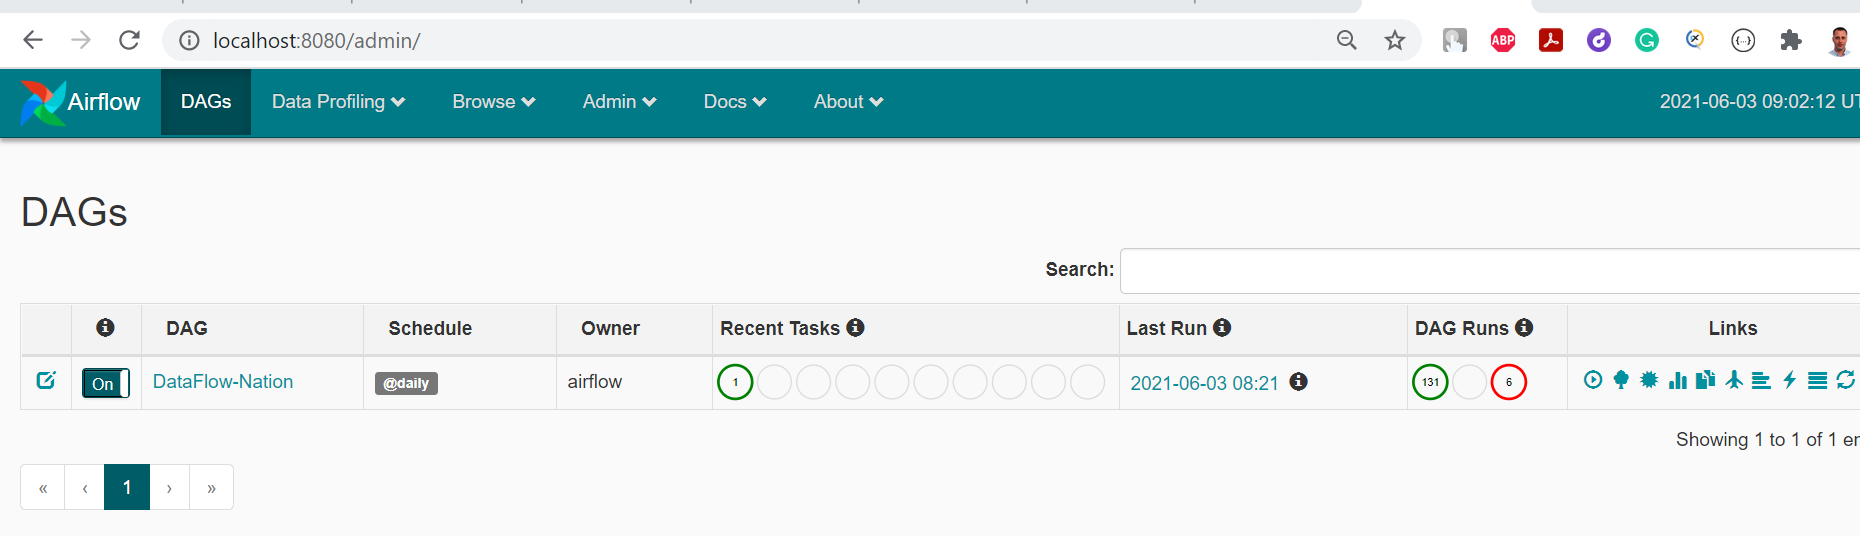

### Наполнение целевых таблиц ДО запуска DAG'ов (=пустые)

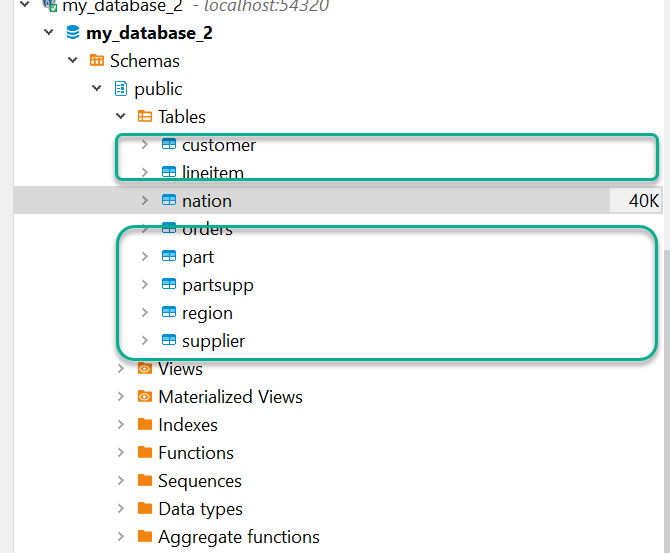

### Копирование DAG'ов в папку DAG'ов, перезапуск контейнеров

### Airflow: вид после копирования DAG'ов и перезапуска контейнеров

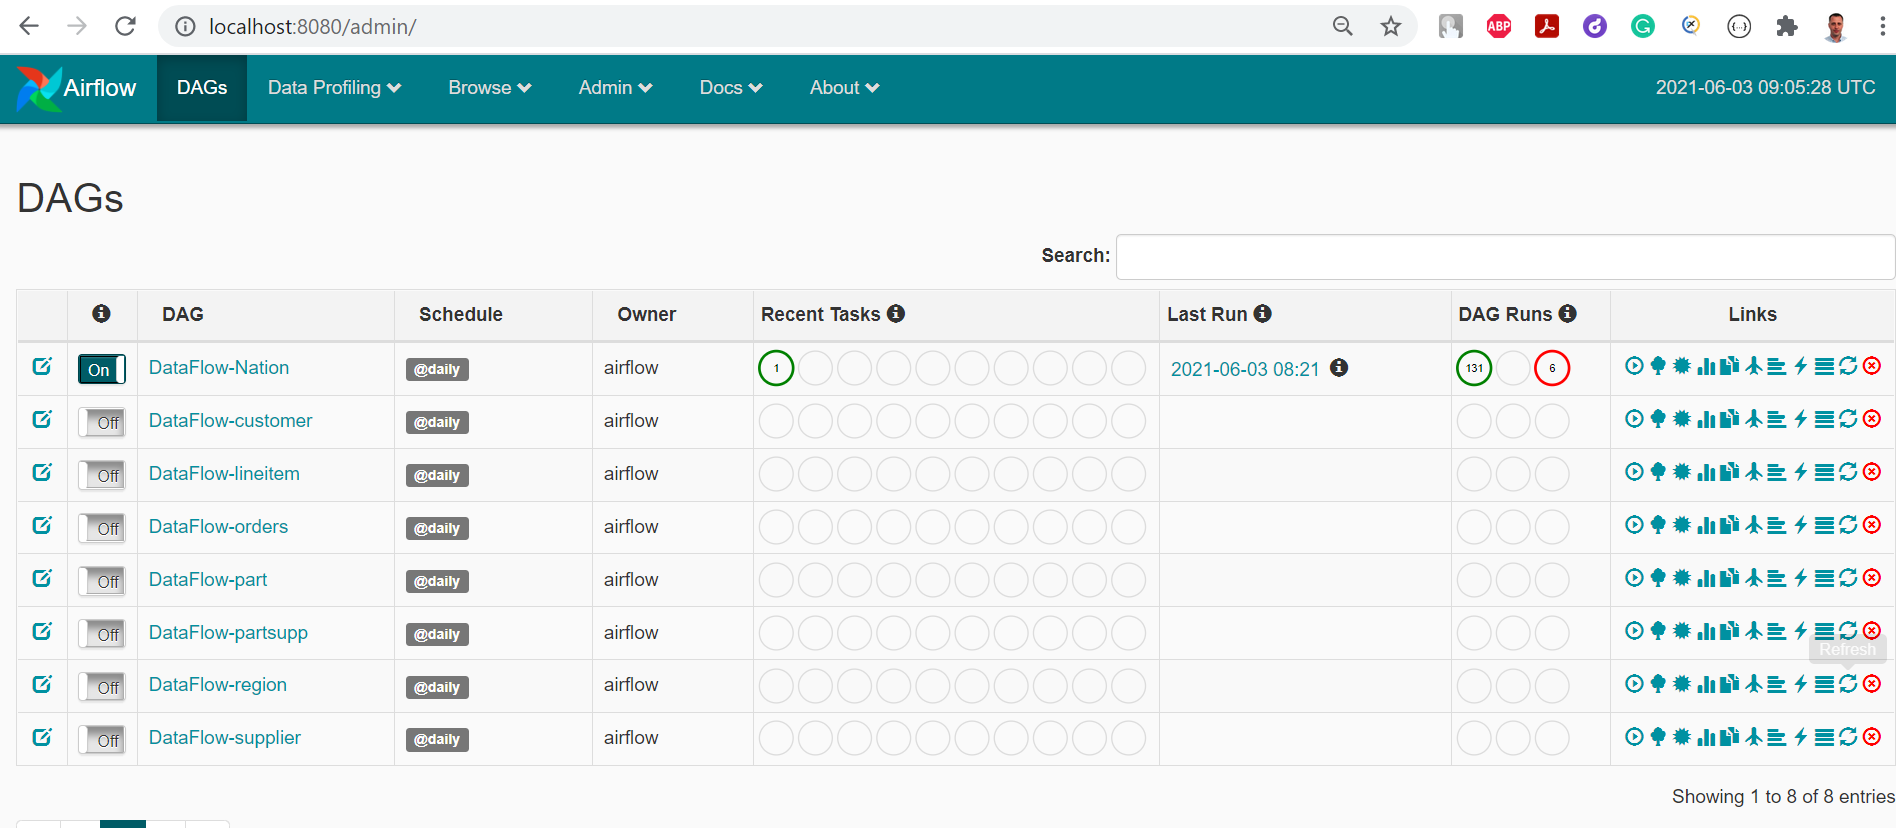

### Airflow: запуск DAG'ов

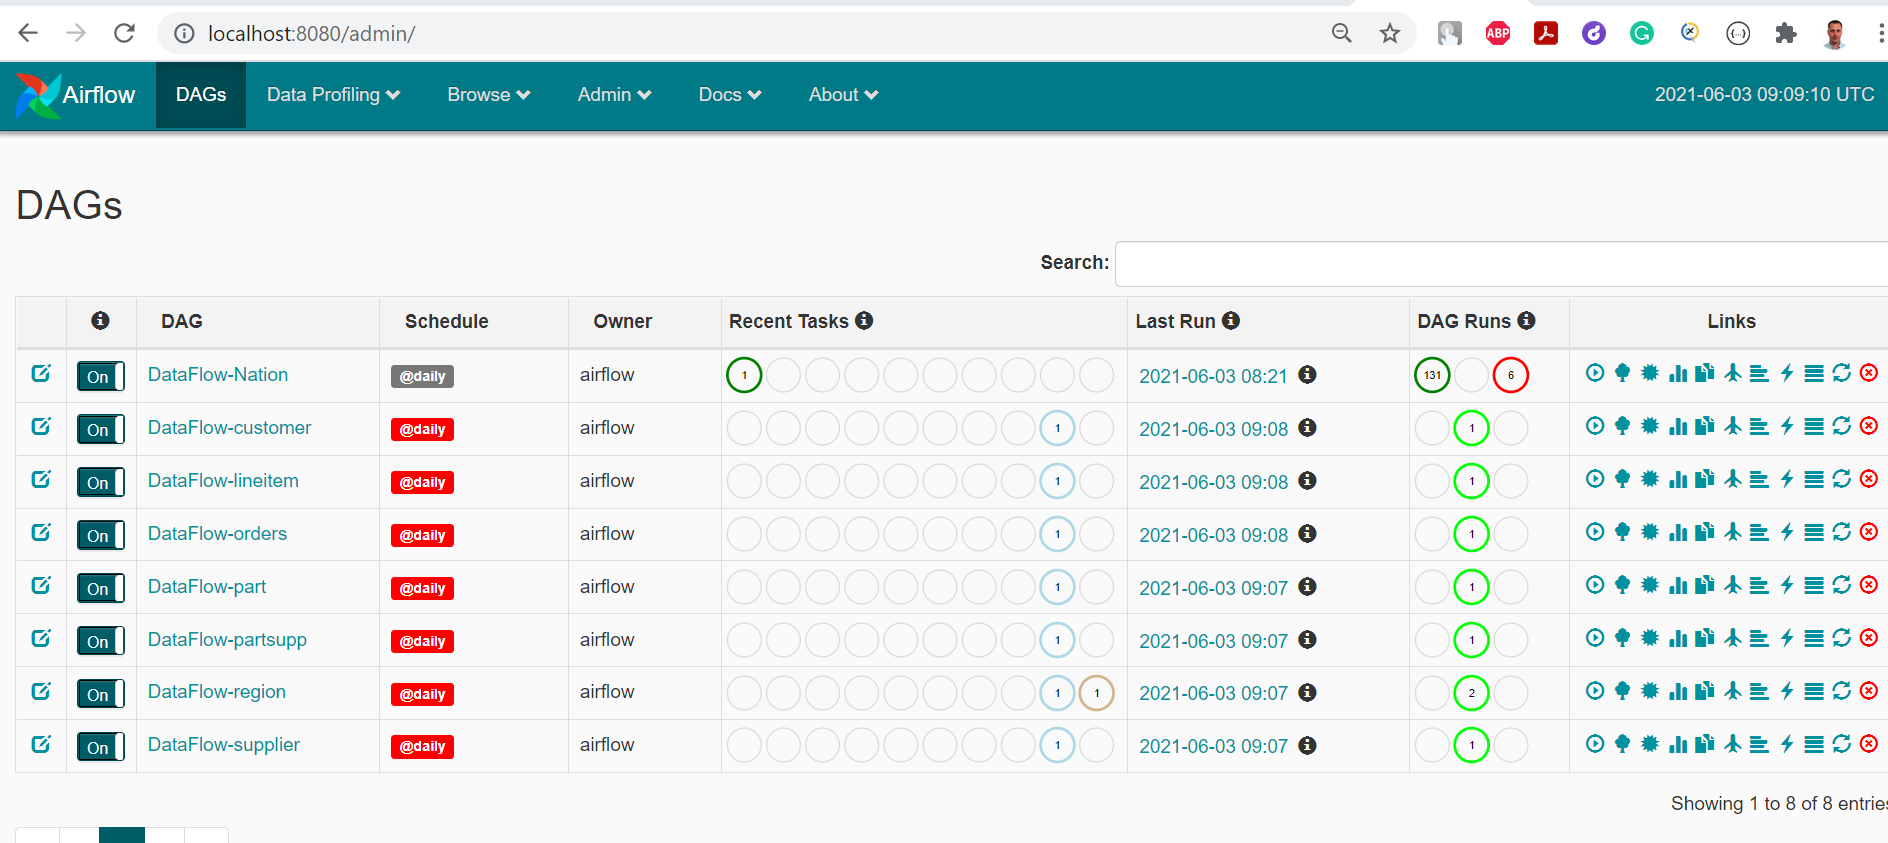

### Airflow: промежуточный статус: 2 DAGа завершились успешно (покажем на примере DAG_region.py)

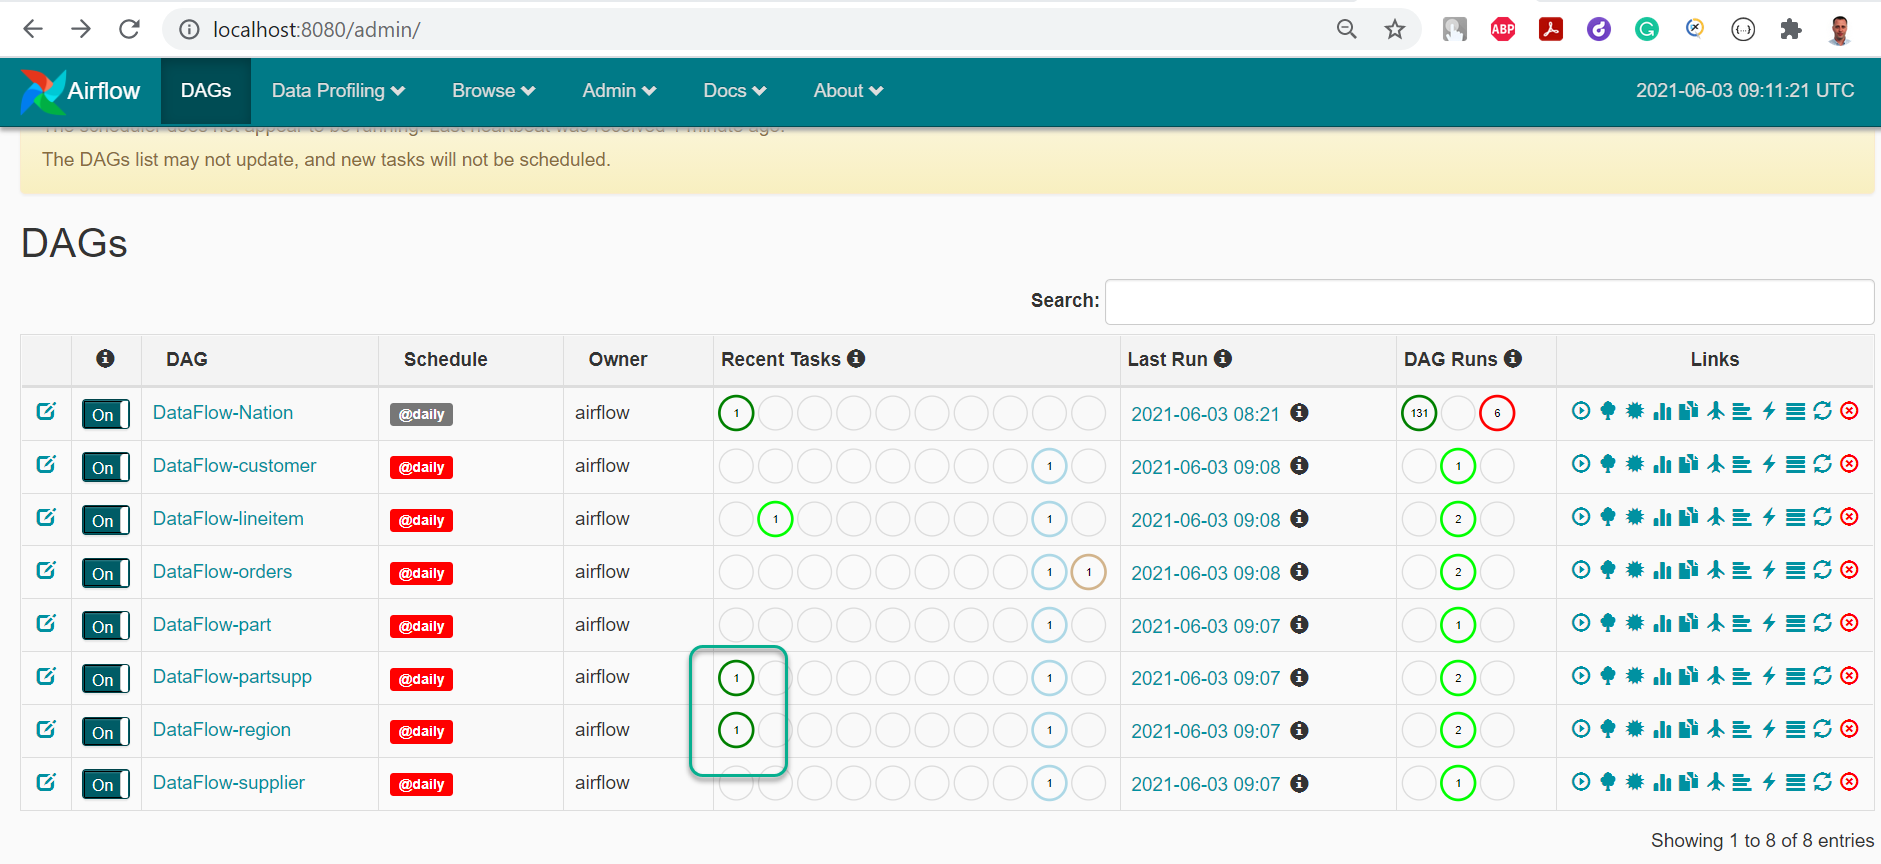

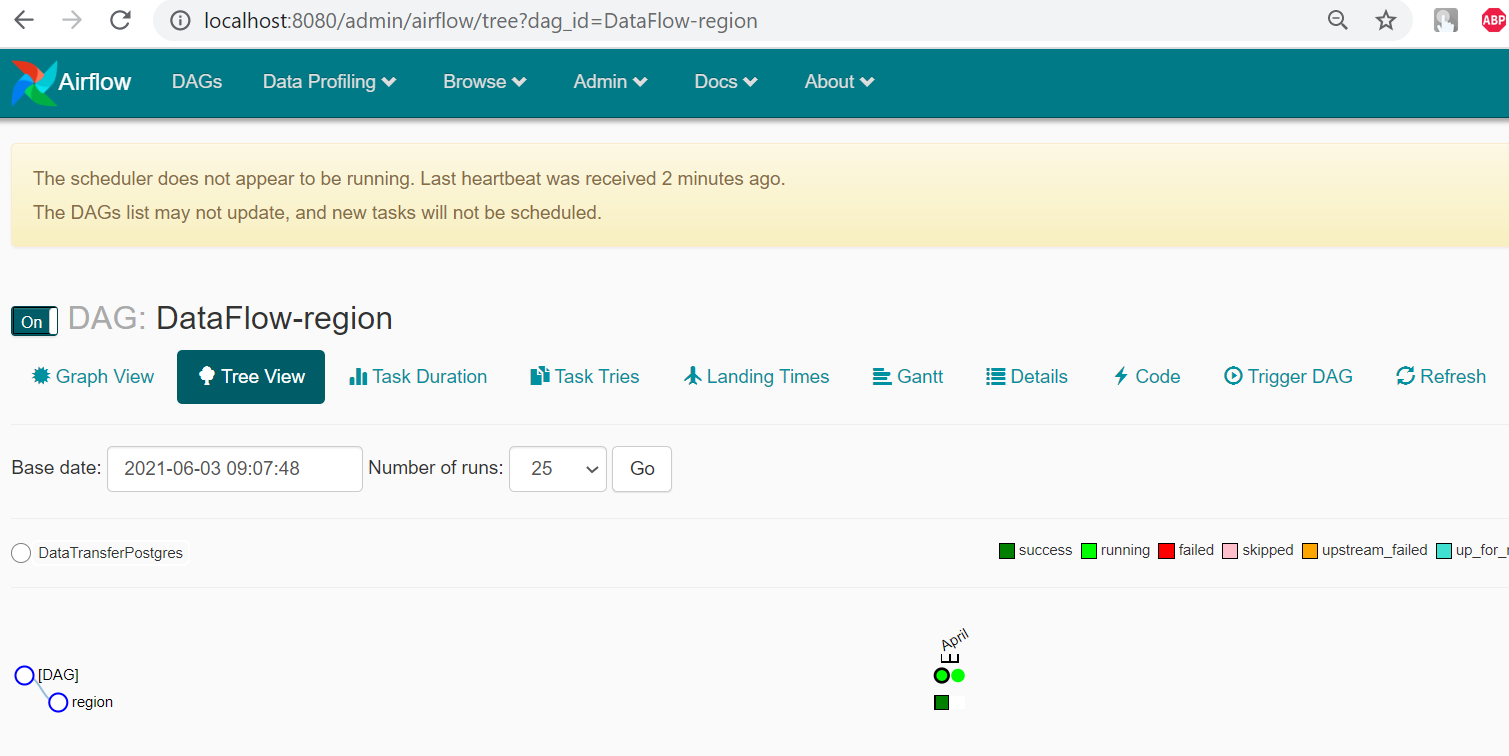

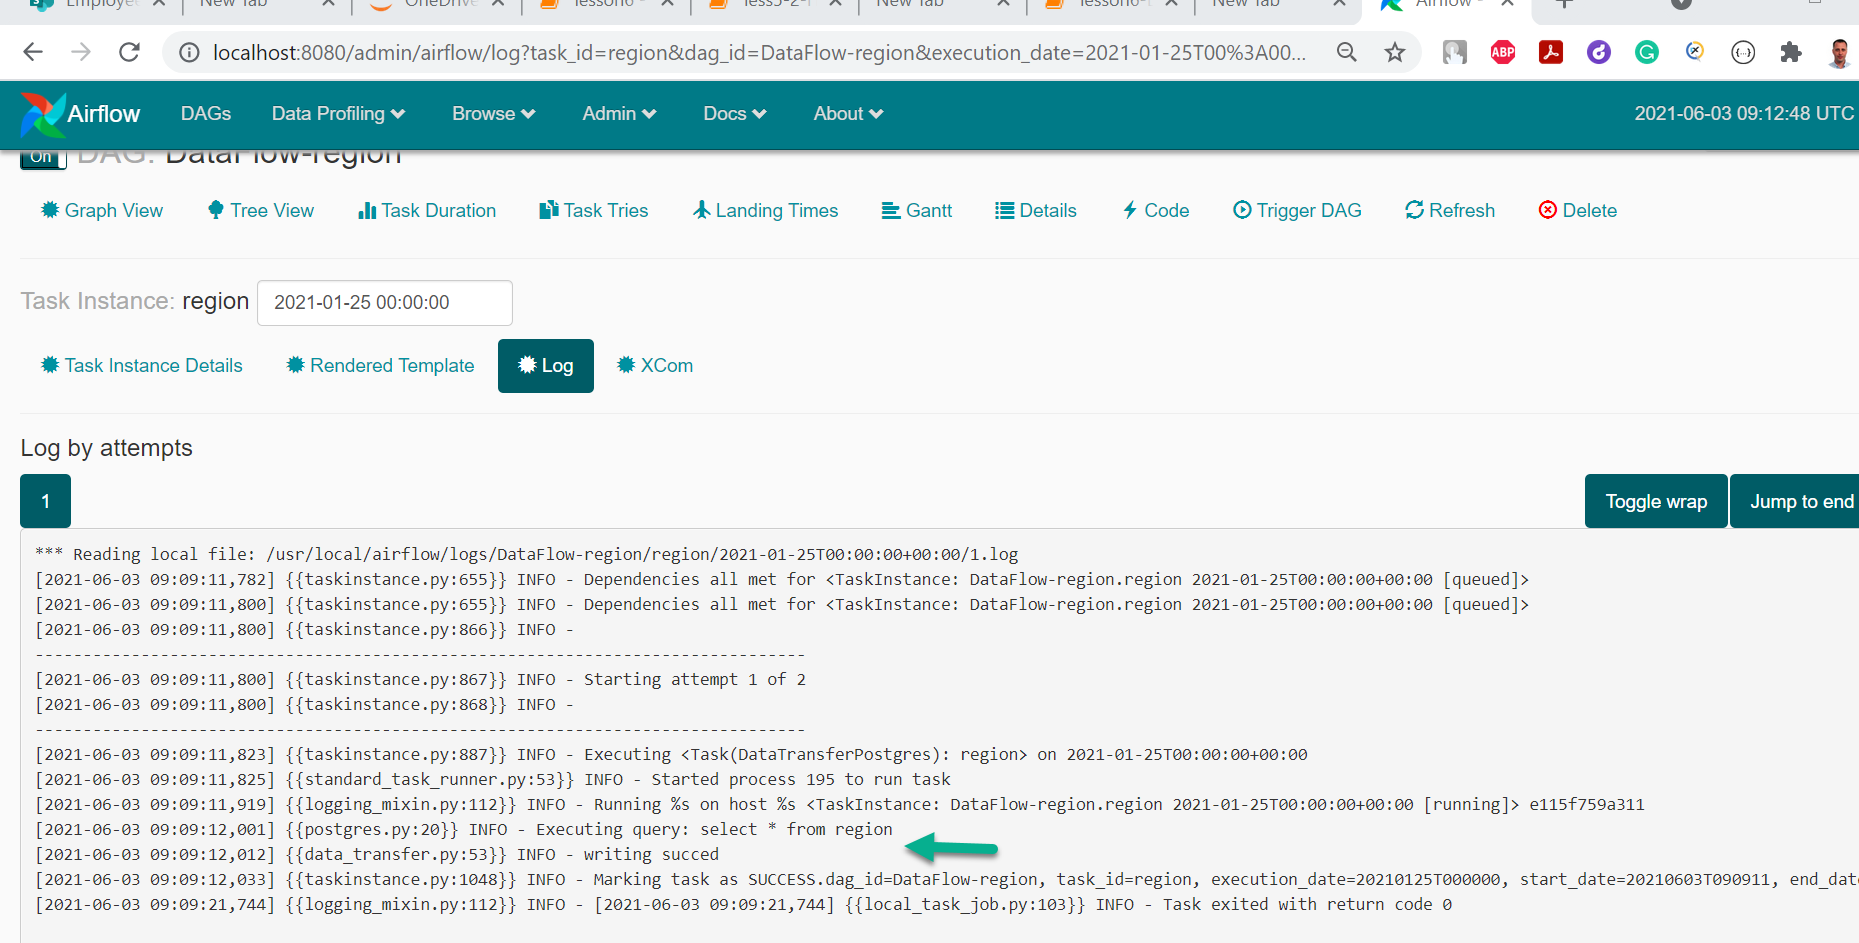

### Процессинг lineitem "подвесил" обработку других DAG' (на 3-5 минут)

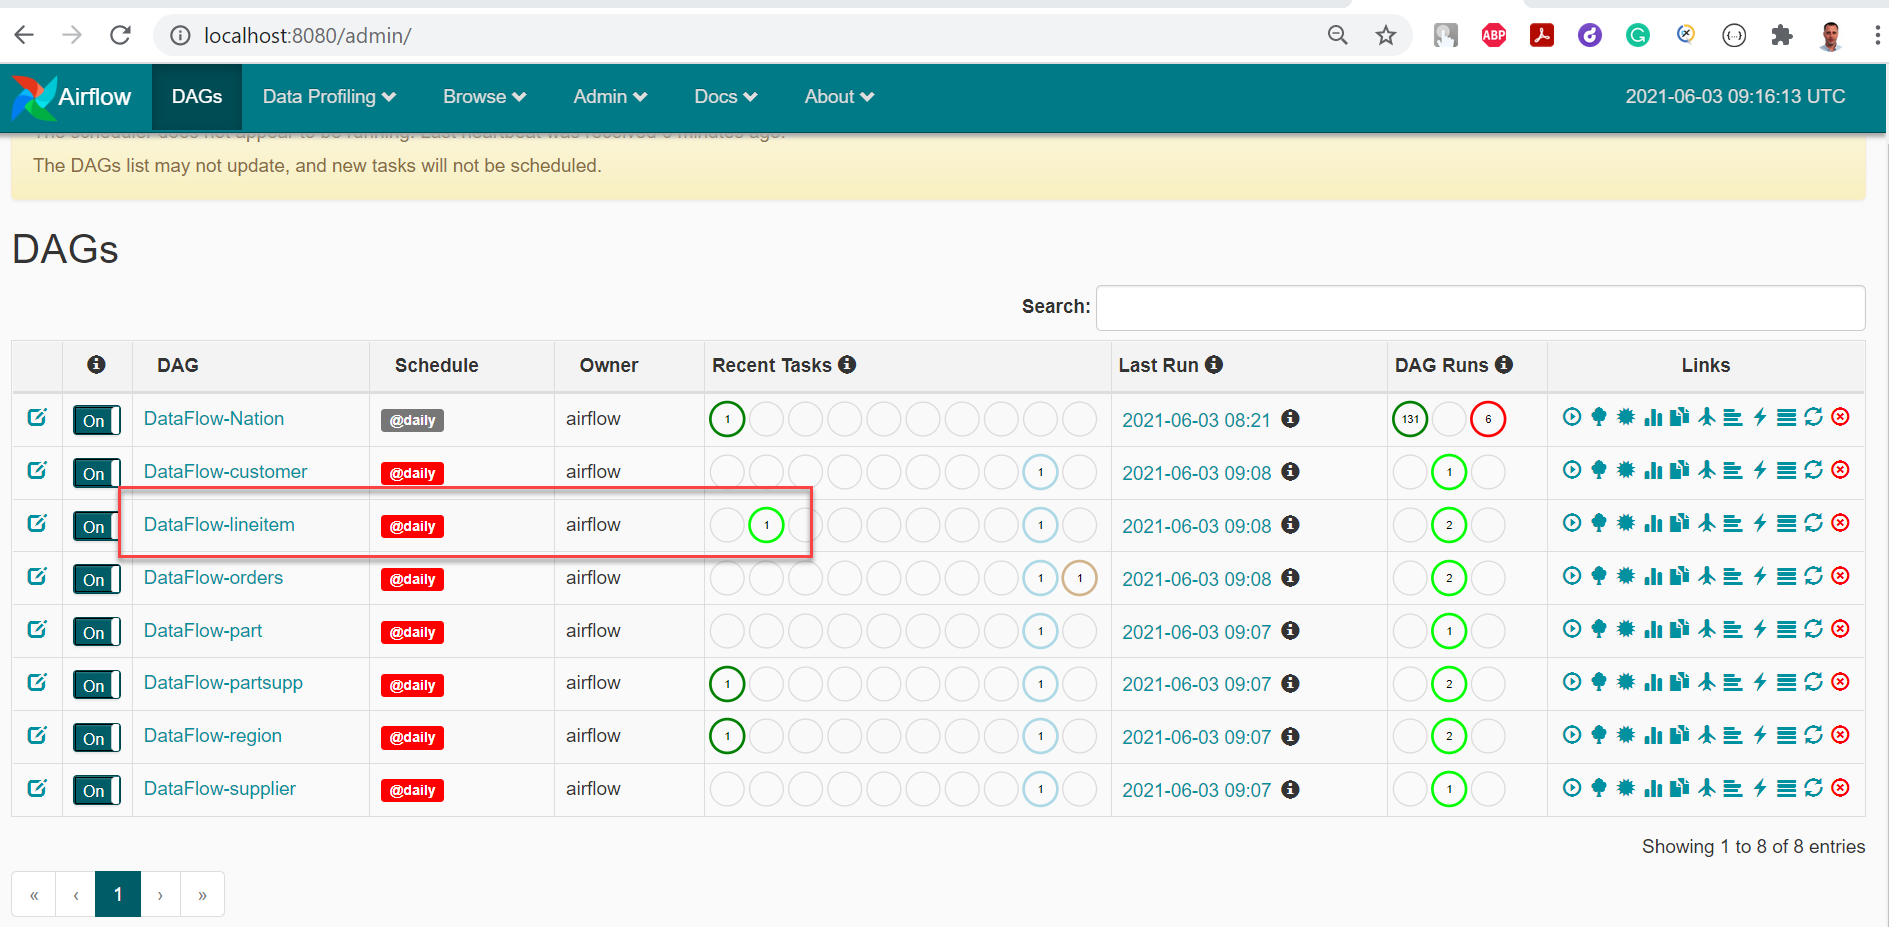

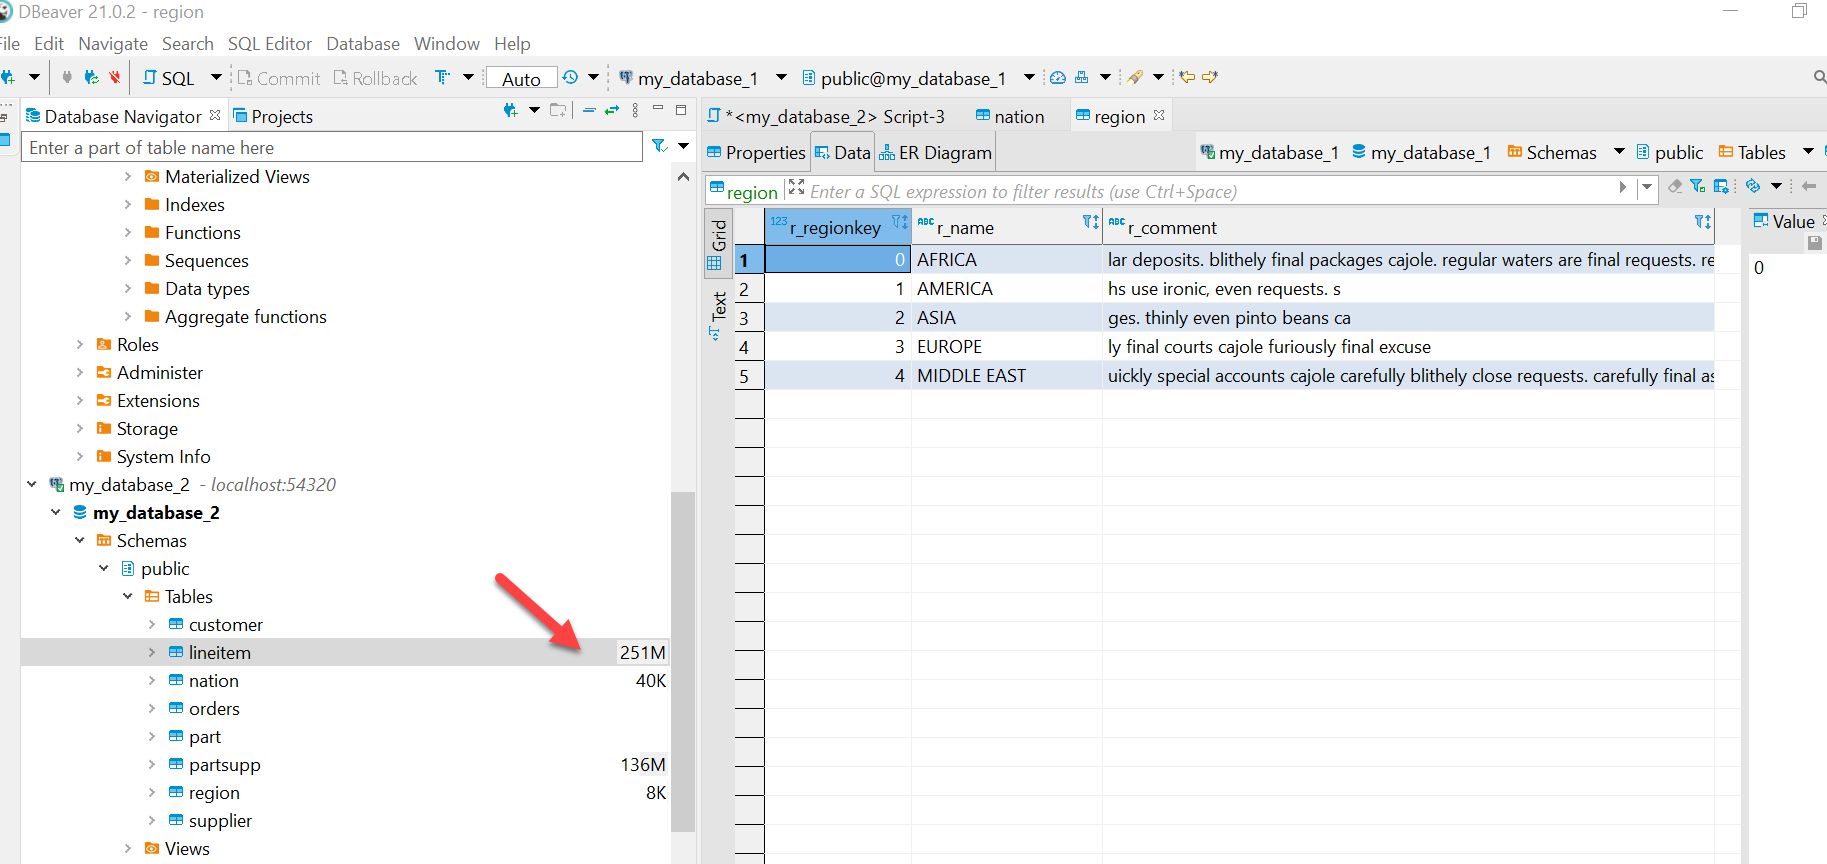

### Процессинг продолжен

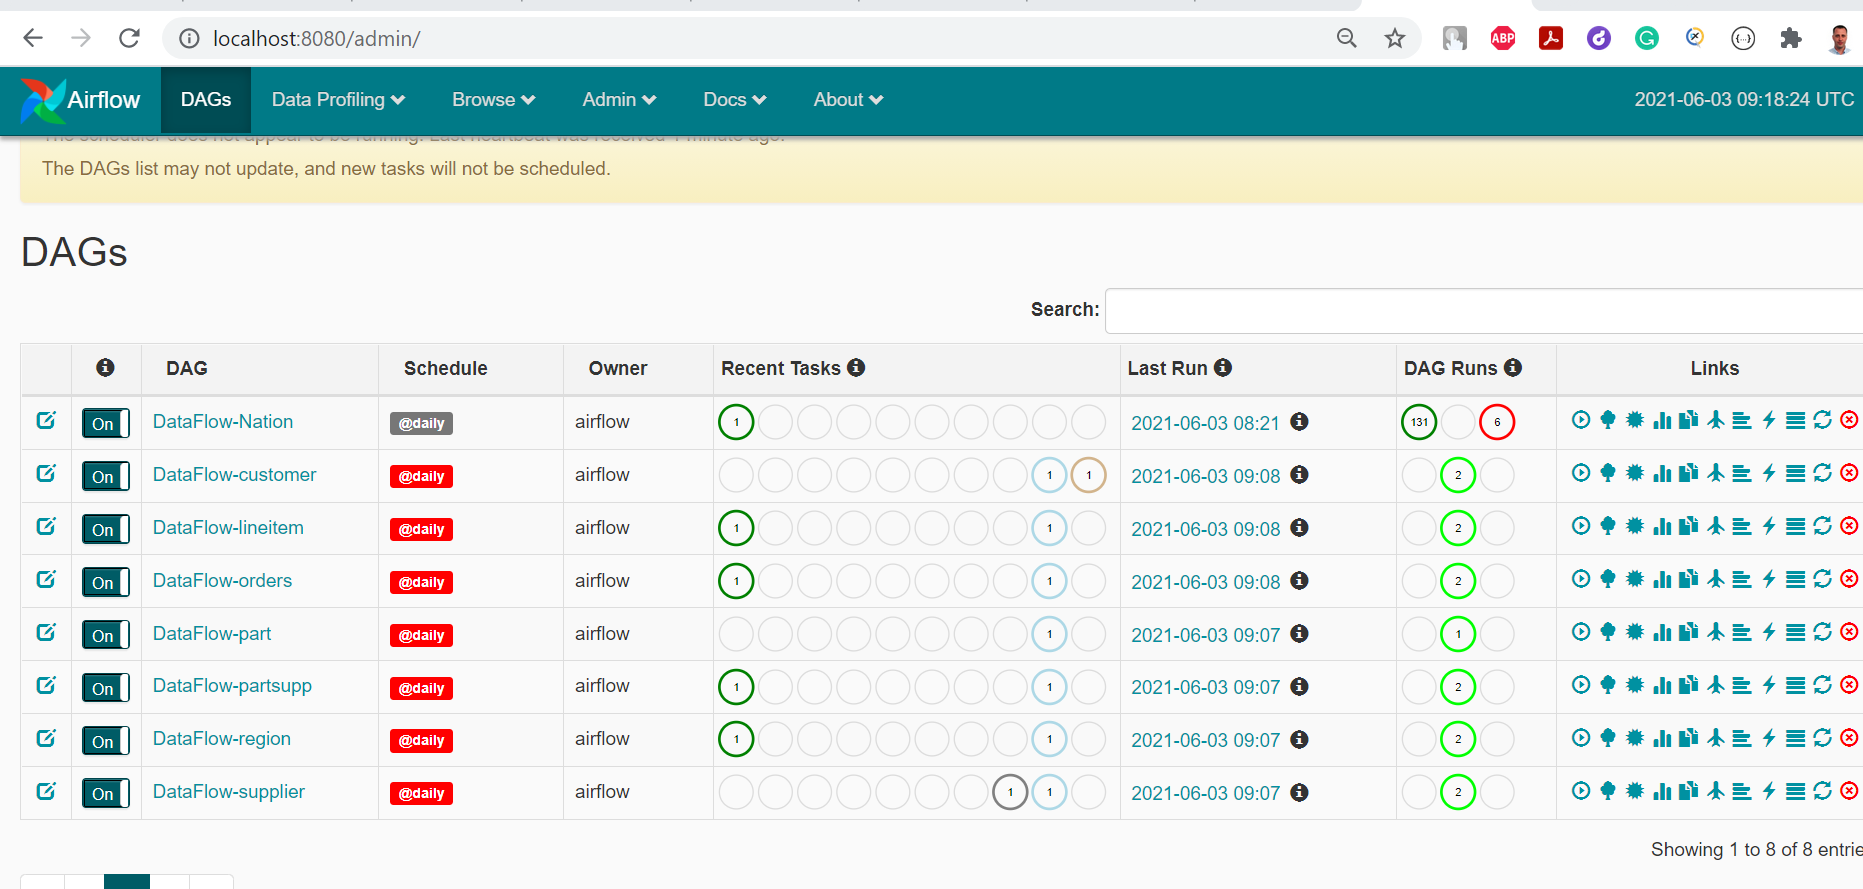

### Процессинг DAG'ов завершился успешно

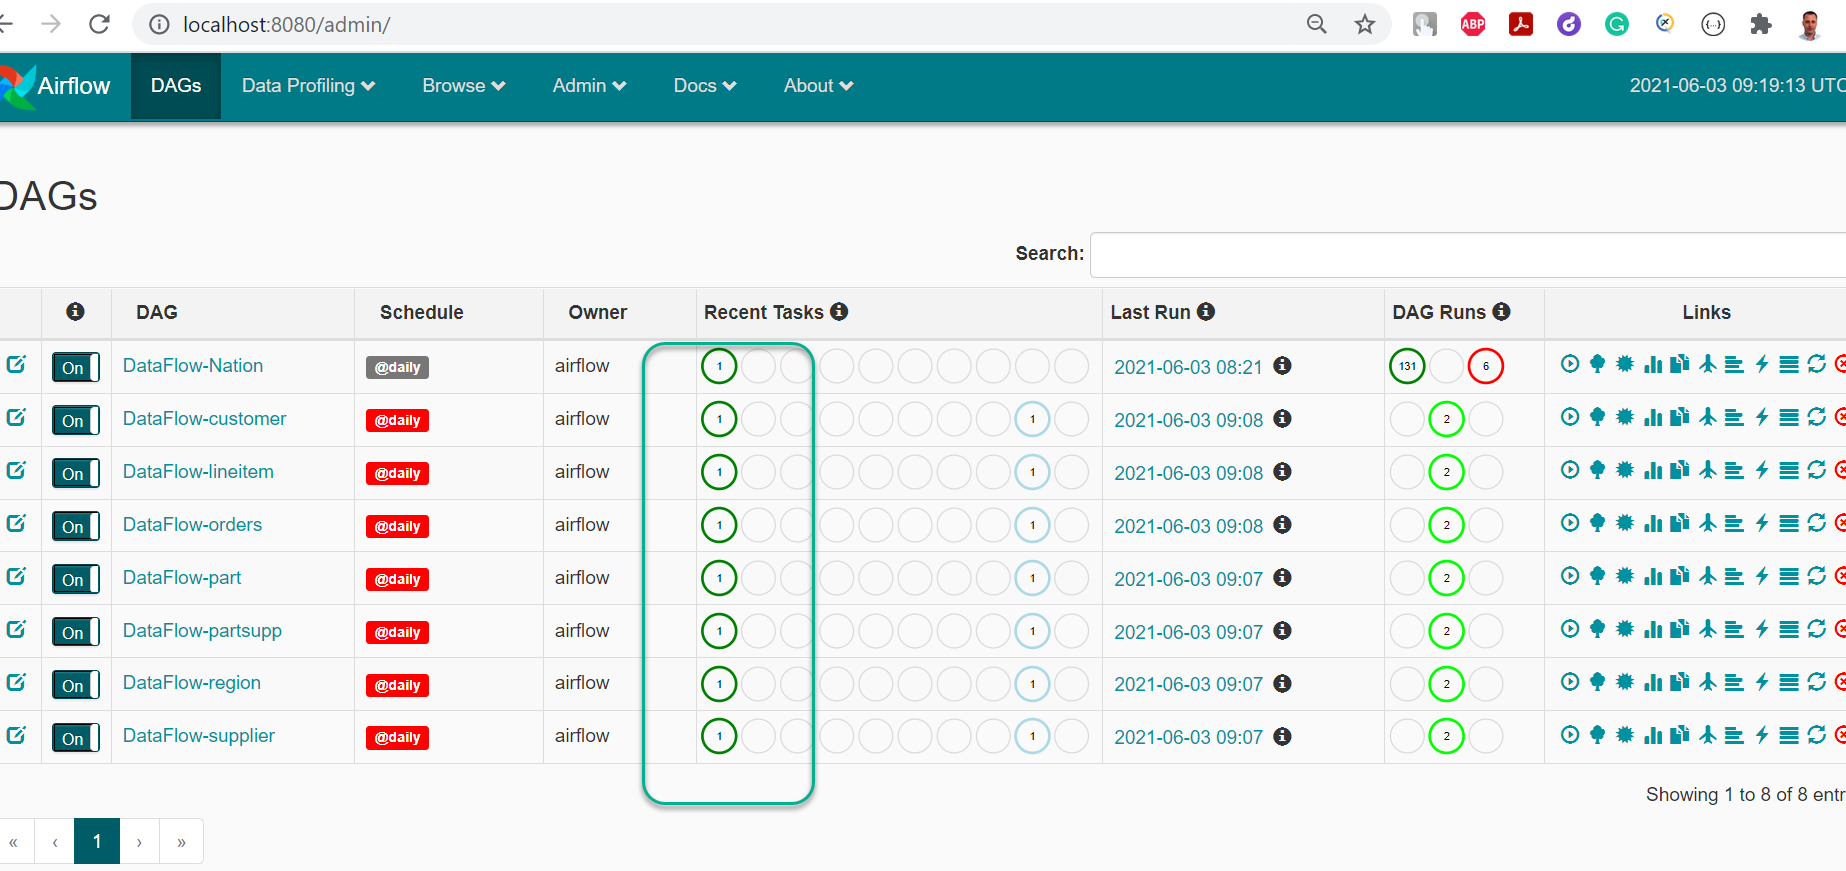

### Целевые таблицы наполнены

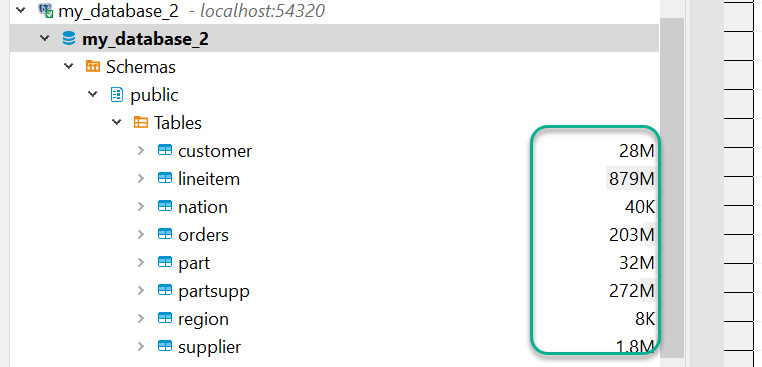

### Считаем строки в целевых таблицах

In [16]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from customer')
    print(cursor.fetchall())

[(150000,)]


In [17]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from lineitem')
    print(cursor.fetchall())

[(6001215,)]


In [18]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from nation')
    print(cursor.fetchall())

[(25,)]


In [19]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from orders')
    print(cursor.fetchall())

[(1500000,)]


In [20]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from part')
    print(cursor.fetchall())

[(200000,)]


In [21]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from partsupp')
    print(cursor.fetchall())

[(1600000,)]


In [22]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from region')
    print(cursor.fetchall())

[(10,)]


In [23]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database_2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from supplier')
    print(cursor.fetchall())

[(10000,)]


# Завершение домашнего задания

---